# Framingham DataSet - EDA and Classification Problem
#### By Sayali Bachhav  
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## Index:  
1. Background
2. Problem Statement  
3. Data Preprocessing 
> Preliminary Analysis  
4. Data Distribution and Outliers  
> 1. Categorical Variables  
> 2. Numerical Variables  
5. Missing Values and Imputation  
6. Correlation Analysis  
7. Normality Check  
8. Undersampling Data  
9. Transformation Pipeline  
10. Modeling  
> - KNN Classifier  
> - Logistic Regression  
> - Decision Tree Classifier  
> - Random Forest Classifier  
> - Bernoullis Naive Beyes Classifier  
> - Bagging Classifiers  
11. Performance Evaluation  
12. Results  
13. CHallenges and Limitations  
14. Future Scope  
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## 1. Background: 

- Identifying people at risk of heart disease and making sure they receive proper treatment can prevent these deaths.  
- Risk startification with the aid of machine learning methods to identify people at risk of having CVD can prove a better preventive, prognostic and management tool for the population.

#### Framingham Heart Study (FHS)
- The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts in US. The data collected can be studied to identify risk factors and their joint effects.
- The given dataset is a subset of the longitudinal data collected as part of FHS and includes laboratory, clinic, questionnaire, and adjudicated event data on 4,434 participants from which 10-year coronary heart disease risk has been noted over years of surveillance in the participants.
- Original current data source  
Available on request here - Link - https://biolincc.nhlbi.nih.gov/teaching/


**FHS Data Atrributes**:  
Orginal list of attributes - 
> ['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
           'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
           'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
           'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD',
           'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
           'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP']  

The following characteristics or **risk factors** data are provided in the dataset - 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD', 'HDLC', 'LDLC'  


For Each participant the following **event data** is provided:  
'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD', 'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD', 'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'  
           
**Filtering data to get ten year CHD risk**:  
TIME and PERIOD attribute correspond to number of days since baseline examination and chronological number of visits respectively. For our 10 year CHD risk, we will be filtering data with participants at *1st baseline visit (PERIOD = 1)* and then calculating 10 year CHD risk from columns 'ANYCHD' anf 'TIMECHD' that has occured within 10 years (3650 days) of baseline visit.  

*The Ten Year CHD is obtained from columns 'ANYCHD' anf 'TIMECHD' with time of event if occuring with less than or equal to (<=) 10 years (3650 days).* 


| Variable  | Description | Units |
| ------------- | ------------- | ------------- |
| GENDER  | Participant Gender  | 1=Male, 2=Female |
| AGE  | Age at exam (years) |  |
| EDUC  | Attained Education | 1=0-11 years, 2=High School Diploma GED,  3=Some College Vocational School, 4=College (BS, BA) degree or more |
| CURMOKE  | Current cigarette smoking at exam | 0=Not current smoker 1=Current smoker |
| CIGPDAY  | Number of cigarettes smoked each day | 0=Not current smoker, 1-90 cigarettes per day |
| BPMEDS  | Use of Anti-hypertensive medication at exam | 0=Not currently used, 1=Current Use |
| PREVCHD | Prevalent Coronary Heart Disease defined as pre-existing Angina Pectoris, Myocardial Infarction (hospitalized, silent or unrecognized), or Coronary Insufficiency (unstable angina)|0=Free of disease 1=Prevalent disease |
| PREVMI | Prevalent Myocardial Infarction|0=Free of disease 1=Prevalent disease|
| PREVAP | Prevalent Angina Pectoris at exam | 0=Free of disease 1=Prevalent disease|
| PREVSTRK  | Prevalent Stroke | 0=Free of disease, 1=Prevalent disease |
| PREVHYP  | Prevalent Hypertensive. Subject was defined as hypertensive if treated or if second exam at which mean systolic was >=140 mmHg or mean Diastolic >=90 mmHg | 0=Free of disease, 1=Prevalent disease |
| DIABETES  | Diabetic according to criteria of first exam treated or first exam with casual glucose of 200 mg/dL or more | 0=Not a diabetic 1=Diabetic |
| TOTCHOL  | Serum Total Cholesterol (mg/dL) |  |
| SYSBP  | Systolic Blood Pressure (mean of last two of three measurements) (mmHg) |  |
| DIABP | Diastolic Blood Pressure (mean of last two of three measurements) (mmHg) | |
| BMI | Body Mass Index, weight in kilograms/height meters squared | | 
| HEARTRTE | Heart rate (Ventricular rate) in beats/min | |
| GLUCOSE | Casual serum glucose (mg/dL) | |

**Target variable**:
10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

## 2. Problem Statement:  

The goal of the analysis is to predict whether the participant has 10-year risk of developing (CHD) coronary heart disease based on current data on risk factors for a participant. 

Questions to ask:
1. Which risk factors do the dataset have?
2. How is the correlation of risk factors with our target value?
3. How is our data distributed based on demographic data (sex, age, education level)?
4. How is the behavioural data represented in our data?
5. Does our target variable have balanced representation in our dataset?
6. Applicability of data in view of population demographics

## 3. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import svm
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, fbeta_score
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
data = pd.read_csv('frmgham2.csv')

In [3]:
data.columns

Index(['RANDID', 'SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE',
       'CIGPDAY', 'BMI', 'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'educ',
       'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'TIME', 'PERIOD',
       'HDLC', 'LDLC', 'DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD', 'ANYCHD',
       'STROKE', 'CVD', 'HYPERTEN', 'TIMEAP', 'TIMEMI', 'TIMEMIFC', 'TIMECHD',
       'TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [5]:
data.head(3)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


> **Eliminating event data attributes except for CHD**  
*Also dropping irrelevant data columns*

In [6]:
toRemove = ['TIME','DEATH', 'ANGINA', 'HOSPMI', 'MI_FCHD','STROKE', 'CVD', 'HYPERTEN', 
            'TIMEAP', 'TIMEMI', 'TIMEMIFC','TIMESTRK', 'TIMECVD', 'TIMEDTH', 'TIMEHYP'] 

In [7]:
data = data.drop(toRemove, axis=1)

> **Deriving target variable as Ten-years risk of developing CHD from 'ANYCHD' and 'TIMECHD' data columns**

In [8]:
def tenyrchd(row):
    if row==0:
        return 0
    elif row<=3650:
        return 1
    else:
        return 0
    
data['TenYearCHD']=data['TIMECHD'].apply(tenyrchd)
data.reset_index(drop=True,inplace=True)

In [9]:
data = data.drop(['ANYCHD','TIMECHD'], axis=1)

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

RANDID           0
SEX              0
TOTCHOL        409
AGE              0
SYSBP            0
DIABP            0
CURSMOKE         0
CIGPDAY         79
BMI             52
DIABETES         0
BPMEDS         593
HEARTRTE         6
GLUCOSE       1440
educ           295
PREVCHD          0
PREVAP           0
PREVMI           0
PREVSTRK         0
PREVHYP          0
PERIOD           0
HDLC          8600
LDLC          8601
TenYearCHD       0
dtype: int64

> ### Preliminary Imputation for Missing values:  
> #### As we have 1 to 3 visits (Period 1, 2, 3) for one participant (Uniquely identified by RANDID), and our data of interest belongs to only PERIOD 1, we can interpolate cinical readings from participant's follow up visits for now.

In [12]:
data['BMI'] = data['BMI'].fillna(data.groupby(['RANDID'])['BMI'].transform('mean'))

In [13]:
data['GLUCOSE'] = data['GLUCOSE'].fillna(data.groupby(['RANDID'])['GLUCOSE'].transform('mean'))

In [14]:
data[['TOTCHOL','CIGPDAY','HEARTRTE']] = data[['TOTCHOL','CIGPDAY','HEARTRTE']].fillna(data.groupby(['RANDID'])[['TOTCHOL','CIGPDAY','HEARTRTE']].transform('mean'))

In [15]:
ids = data[(data.BPMEDS.isna()) & (data.PERIOD==1)]['RANDID']
for i in ids:
    row = data[(data.RANDID==i) & (data.PERIOD==2)]
    if row.empty:
        pass
    else:
        # print(data[(data.RANDID==i) & (data.PERIOD==2)]['BPMEDS'].values[0])
        data.loc[((data.RANDID==i) & (data.PERIOD==1)),'BPMEDS']=data[(data.RANDID==i) & (data.PERIOD==2)]['BPMEDS'].values[0]

In [16]:
data.isnull().sum()

RANDID           0
SEX              0
TOTCHOL         25
AGE              0
SYSBP            0
DIABP            0
CURSMOKE         0
CIGPDAY          1
BMI             22
DIABETES         0
BPMEDS         541
HEARTRTE         0
GLUCOSE        114
educ           295
PREVCHD          0
PREVAP           0
PREVMI           0
PREVSTRK         0
PREVHYP          0
PERIOD           0
HDLC          8600
LDLC          8601
TenYearCHD       0
dtype: int64

### Getting data of our interest (PERIOD=1) 

> **Data of our interest from first visit to diagnose 10 year risk of CHD**

In [17]:
df = data[data.PERIOD==1]

In [18]:
df = df.drop('PERIOD', axis=1)

In [19]:
# df.drop(['PREVAP', 'PREVMI' ], axis=1, inplace=True)
# df.columns

In [20]:
df.rename(columns={'SEX':'sex', 'AGE':'age', 'CURSMOKE':'currentSmoker', 'CIGPDAY':'cigsPerDay', 
                   'DIABETES':'diabetes', 'BPMEDS':'BPMeds', 'SYSBP':'sysBP', 'DIABP':'diaBP',
                   'HEARTRTE':'heartRate', 'GLUCOSE':'glucose', 'TOTCHOL':'totChol', 
                   'PREVCHD':'prevCHD', 'PREVAP':'prevalentAP','PREVSTRK':'prevalentStroke', 
                   'PREVMI':'prevalentMI','PREVHYP':'prevalentHyp'}, inplace=True)

In [21]:
# List of columns in our dataset
df.columns

Index(['RANDID', 'sex', 'totChol', 'age', 'sysBP', 'diaBP', 'currentSmoker',
       'cigsPerDay', 'BMI', 'diabetes', 'BPMeds', 'heartRate', 'glucose',
       'educ', 'prevCHD', 'prevalentAP', 'prevalentMI', 'prevalentStroke',
       'prevalentHyp', 'HDLC', 'LDLC', 'TenYearCHD'],
      dtype='object')

In [22]:
# Number of unique values across variables
df.nunique()

RANDID             4434
sex                   2
totChol             260
age                  39
sysBP               237
diaBP               149
currentSmoker         2
cigsPerDay           39
BMI                1395
diabetes              2
BPMeds                2
heartRate            73
glucose             195
educ                  4
prevCHD               2
prevalentAP           2
prevalentMI           2
prevalentStroke       2
prevalentHyp          2
HDLC                  0
LDLC                  0
TenYearCHD            2
dtype: int64

In [23]:
# Checking for total number of missing values across variables
df.isnull().sum()

RANDID                0
sex                   0
totChol              15
age                   0
sysBP                 0
diaBP                 0
currentSmoker         0
cigsPerDay            1
BMI                  14
diabetes              0
BPMeds                9
heartRate             0
glucose              68
educ                113
prevCHD               0
prevalentAP           0
prevalentMI           0
prevalentStroke       0
prevalentHyp          0
HDLC               4434
LDLC               4434
TenYearCHD            0
dtype: int64

In [24]:
# All records are missing for HDLC and LDLC
df.drop(['HDLC', 'LDLC','RANDID' ], axis=1, inplace=True)

In [26]:
categorical_att = ['sex','currentSmoker','educ','BPMeds','diabetes','prevCHD','prevalentAP','prevalentMI','prevalentStroke', 'prevalentHyp','TenYearCHD']
cont_att=['age','cigsPerDay', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

In [27]:
# Converting dataType of categorical variables to pandas 'Category' dtype
df[categorical_att]=df[categorical_att].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4434 entries, 0 to 11624
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              4434 non-null   category
 1   totChol          4419 non-null   float64 
 2   age              4434 non-null   int64   
 3   sysBP            4434 non-null   float64 
 4   diaBP            4434 non-null   float64 
 5   currentSmoker    4434 non-null   category
 6   cigsPerDay       4433 non-null   float64 
 7   BMI              4420 non-null   float64 
 8   diabetes         4434 non-null   category
 9   BPMeds           4425 non-null   category
 10  heartRate        4434 non-null   float64 
 11  glucose          4366 non-null   float64 
 12  educ             4321 non-null   category
 13  prevCHD          4434 non-null   category
 14  prevalentAP      4434 non-null   category
 15  prevalentMI      4434 non-null   category
 16  prevalentStroke  4434 non-null   category

In [28]:
print('Total number of records in our dataset : {} \nTotal number of attributes: {} \nTarget Variable : 1 [TenYearCHD]'.
      format(df.shape[0],df.shape[1]-1))

Total number of records in our dataset : 4434 
Total number of attributes: 18 
Target Variable : 1 [TenYearCHD]


## Preliminary Analysis:  
- **Total number of records** in our dataset : 4434   
Total number of **attributes**: 18  
- **Target Variable** : 1 [TenYearCHD]  
- **Categorical Variables** : Total 11 Attributes (Each with 2 unique nominal categories except for Education with 4 ordinal categories)  
> Sex, Education, Current Smoking, BP medication, prevalent CHD, prevalent AP, prevalent MI, Prevalent Stroke, Prevalent Hypertension, Diabetes, and Ten-Year CHD Risk  
- **Numerical Variables** : Total 8 Attributes  
> Age, Number of Cigs smoked per day, Total Cholesterol, Systolic and Diastolic BP, BMI, Heart Rate and Serum Glucose level  
- **Data Types** :  
> a. Categorical Attributes have been tranformed from 'int64' to 'Category' dtype  
> b. Continuous variables having 'float64' dtype   
>> 'Category' dtype in pandas has been used as it reduces memory usage, and implements hashing which in turn helps to improve ML/classifiers efficiency  
- **Missing Values** : 
> **Initial imputation** has been done for a participant from follow-up records with mean for numerical variables and the immediate follow-up value for BP meds (categorical)  
> Final cleaned dataset of interest ia having total 6 variables with missing values. 
> - Education, cigsPerDay, BPMeds, totChol, BMI and glucose  
> - Glucose with majority of missing values (68)

## 4. Data Distribution and Outliers 

### 4.1 Categorical Variables

In [29]:
# Statistical Summary of Categorical Variables
df[categorical_att].describe()

,sex,currentSmoker,educ,BPMeds,diabetes,prevCHD,prevalentAP,prevalentMI,prevalentStroke,prevalentHyp,TenYearCHD
count,4434,4434,4321.0,4425.0,4434,4434,4434,4434,4434,4434,4434
unique,2,2,4.0,2.0,2,2,2,2,2,2,2
top,2,0,1.0,0.0,0,0,0,0,0,0,0
freq,2490,2253,1822.0,4276.0,4313,4240,4287,4348,4402,3004,3790


In [30]:
df.sex.cat.categories

Int64Index([1, 2], dtype='int64')

In [31]:
df['sex'] = df['sex'].cat.rename_categories({2: 0})

In [32]:
df['sex'].value_counts().sort_index(ascending=False)

0    2490
1    1944
Name: sex, dtype: int64

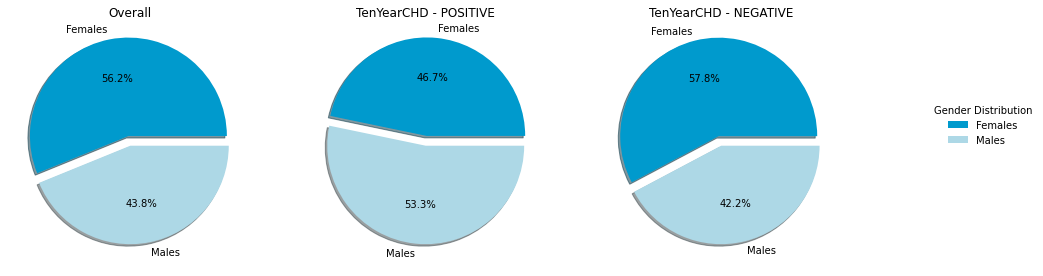

In [33]:
# Visualizing sex distribution in our dataset as a whole and among target variable groups

fig, ax = plt.subplots(1,3,figsize=(15,5))
labels = ['Females','Males']

values1 = df['sex'].value_counts().sort_index(ascending=False).values
values2 = df[df['TenYearCHD']==1]['sex'].value_counts().sort_index(ascending=False).values
values3 = df[df['TenYearCHD']==0]['sex'].value_counts().sort_index(ascending=False).values

explode=(0.1,0)

ax[0].pie(values1,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Overall')
#ax[0].legend(frameon=False)

ax[1].pie(values2,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[1].set_title('TenYearCHD - POSITIVE')
#ax[1].legend(frameon=False)

ax[2].pie(values3,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[2].set_title('TenYearCHD - NEGATIVE')
ax[2].legend(title='Gender Distribution',frameon=False, loc='upper right', bbox_to_anchor=(1.8,0.7))

plt.show()

/Users/shekhar/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


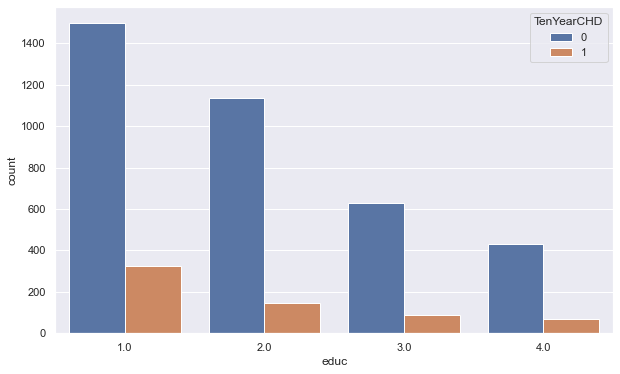

In [34]:
# Visualizing Education levels counts across target variable groups (CHD positive and Negative)

# import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='educ', hue='TenYearCHD')

plt.show()

> **Education attribute has values in range of 1 to 4 which is provided by examiner based on own analysis and is thus prone to subjective bias. Thus we will be eliminating the education attribute.**

In [35]:
# Eliminating Education variable
df.drop(['educ'],axis=1, inplace=True)

In [36]:
categorical_att.remove('educ')

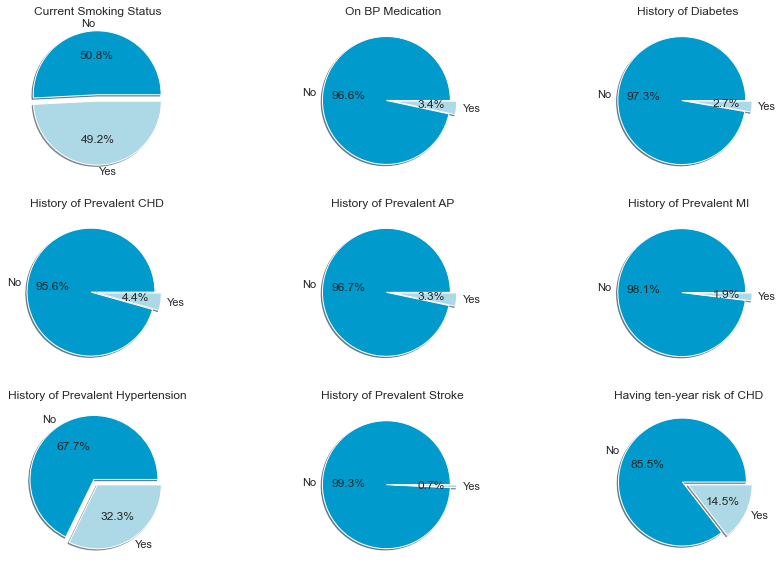

In [37]:
# Visualizing group counts for each categorical variables

fig, ax = plt.subplots(3,3,figsize=(15,10))
labels = ['No','Yes']

values1 = df['currentSmoker'].value_counts().sort_index().values
values2 = df['BPMeds'].value_counts().sort_index().values
values3 = df['diabetes'].value_counts().sort_index().values
values4 = df['prevCHD'].value_counts().sort_index().values
values5 = df['prevalentAP'].value_counts().sort_index().values
values6 = df['prevalentMI'].value_counts().sort_index().values
values7 = df['prevalentHyp'].value_counts().sort_index().values
values8 = df['prevalentStroke'].value_counts().sort_index().values
values9 = df['TenYearCHD'].value_counts().sort_index().values

explode=(0.1,0)

ax[0][0].pie(values1,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[0][0].set_title('Current Smoking Status')

ax[0][1].pie(values2,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[0][1].set_title('On BP Medication')

ax[0][2].pie(values3,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[0][2].set_title('History of Diabetes')

ax[1][0].pie(values4,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[1][0].set_title('History of Prevalent CHD')

ax[1][1].pie(values5,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[1][1].set_title('History of Prevalent AP')

ax[1][2].pie(values6,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[1][2].set_title('History of Prevalent MI')

ax[2][0].pie(values7,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[2][0].set_title('History of Prevalent Hypertension')

ax[2][1].pie(values8,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[2][1].set_title('History of Prevalent Stroke')

ax[2][2].pie(values9,labels=labels,explode=explode,colors=['#009ACD', '#ADD8E6'],autopct='%1.1f%%',shadow=True)
ax[2][2].set_title('Having ten-year risk of CHD')

plt.show()

### Data Distribution Analysis - Categorical Variables:  
- **Sex**: Overall males proportion (43.8%) is less than females (56.2%) however in positive risk of 10-yearCHD group more males (53.3%) are observed, while in negative target group more females (58.9%) are observed  
- **Smokers**: Participants who are not currently smoking and currently smoking are in equal proportion  
- History of **Prevalent Hypertension** is observed in 31.1% of participants
- Participants with history of BP medication, prevalent stroke, AP , MI and Diabetes are within 3% of total participants with top values of absence of history in more than 97% of participants  
- **Education** as a variable is removed from data as it's interpretation is subjective and can lead to subjective bias  
- **Highly imbalnced target variable** : Positive class is represented as only 14.5% of total records. This could achieve high model accuracy with predicting all records with negative class (majority represnted classs) and bias the model performance in real-world scenarios. This should be deal with applying model to balanced dataset achieved with different methods like undersampling.

### 4.2 Numerical Variables

In [38]:
# Getting statistical summary of continuous variables
df[cont_att].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4434.000000,4433.000000,4419.000000,4434.000000,4434.000000,4420.000000,4434.000000,4366.000000
mean,49.925801,8.932890,237.056687,132.907758,83.083559,25.846302,75.891971,82.431974
std,8.676929,11.923472,44.653776,22.421597,12.055999,4.101008,12.112426,24.216274
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.500000,75.000000,23.090000,68.000000,72.000000
50%,49.000000,0.000000,234.000000,129.000000,82.000000,25.450000,75.000000,78.000000
75%,57.000000,20.000000,264.000000,144.000000,90.000000,28.090000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


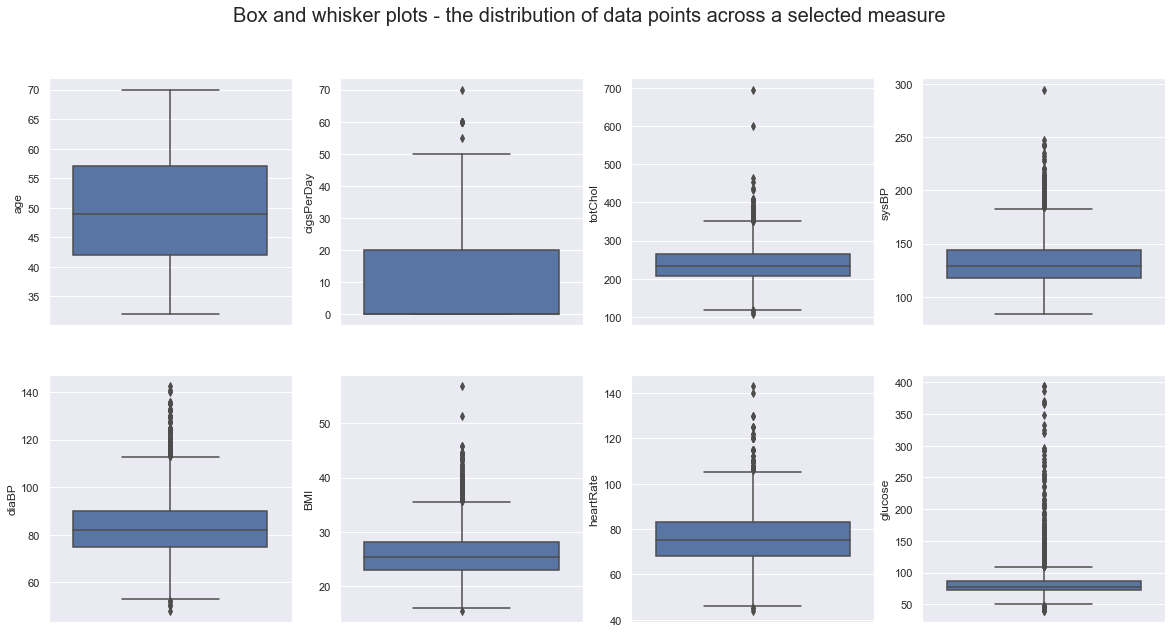

In [39]:
# Visualizing statistical distribution of continuous variables with boxplots

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
 
cont = df[cont_att]
 
sns.boxplot(ax=axes[0, 0], data=cont, y ='age')
sns.boxplot(ax=axes[0, 1], data=cont, y ='cigsPerDay')
sns.boxplot(ax=axes[0, 2], data=cont, y ='totChol')
sns.boxplot(ax=axes[0, 3], data=cont, y ='sysBP')
sns.boxplot(ax=axes[1, 0], data=cont, y ='diaBP')
sns.boxplot(ax=axes[1, 1], data=cont, y ='BMI')
sns.boxplot(ax=axes[1, 2], data=cont, y ='heartRate')
sns.boxplot(ax=axes[1, 3], data=cont, y ='glucose')

fig.suptitle('Box and whisker plots - the distribution of data points across a selected measure', fontsize=20)

plt.show()

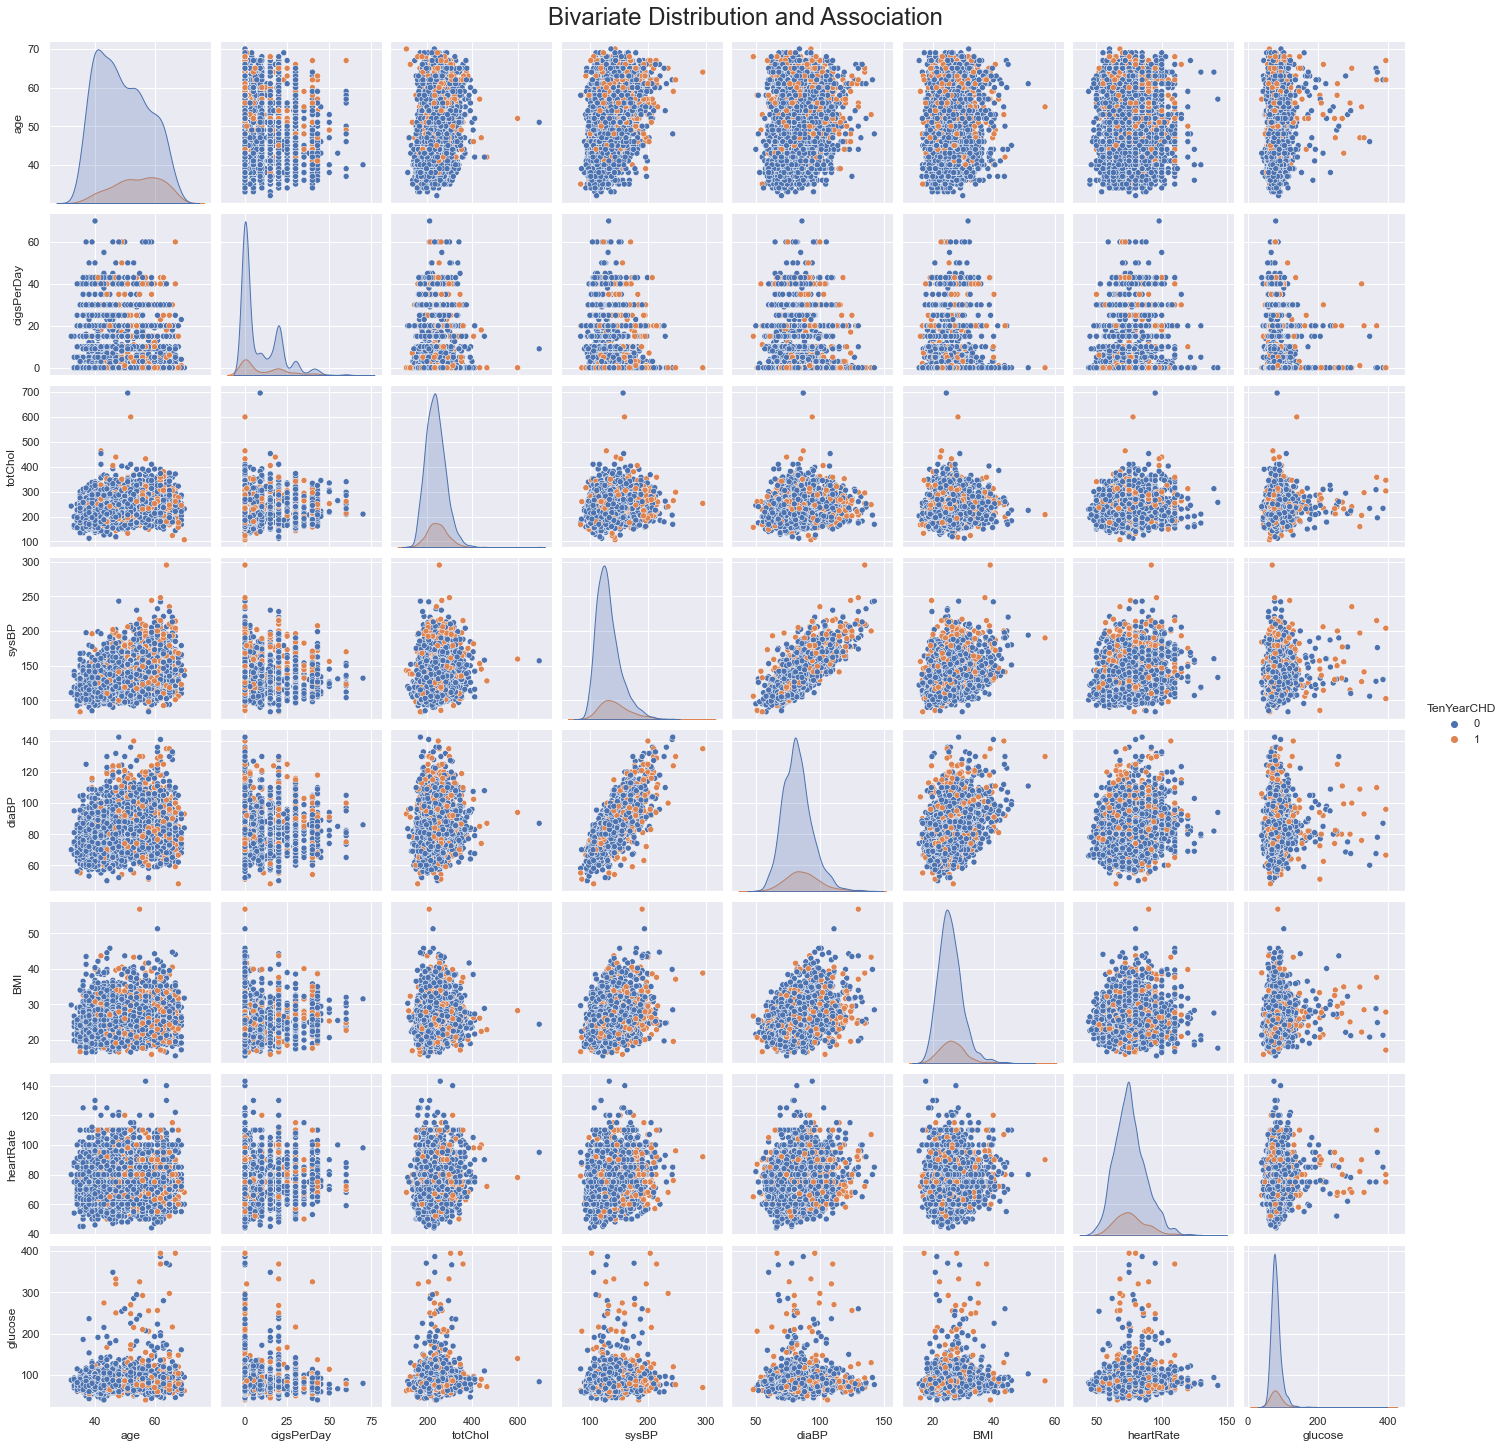

In [40]:
# Bivariate Distribution and Association
p = sns.pairplot(data=df, vars=cont_att, hue='TenYearCHD')
p.fig.suptitle('Bivariate Distribution and Association', fontsize=24, y=1.01)
plt.show()

In [41]:
# Rwmoving obvious outliers detected on boxplot and scatterplots
df[(df['totChol']>500) | (df['sysBP']>275) | (df['BMI']>50) | (df['heartRate']>135)].shape

(7, 18)

In [42]:
df.drop(df[df['totChol']>500].index,inplace=True)
df.drop(df[df['sysBP']>275].index,inplace=True)
df.drop(df[df['BMI']>50].index, inplace=True)
# df.drop(df[df['cigsPerDay']>60].index, inplace=True)
df.drop(df[df['heartRate']>135].index, inplace=True)

In [43]:
df.shape

(4427, 18)

<AxesSubplot:ylabel='Frequency'>

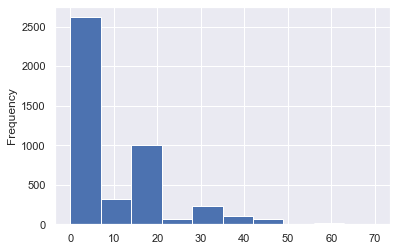

In [44]:
df['cigsPerDay'].plot.hist()

In [45]:
df['cigsPerDay'].describe()

count    4426.000000
mean        8.944984
std        11.928358
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='cigsPerDay'>

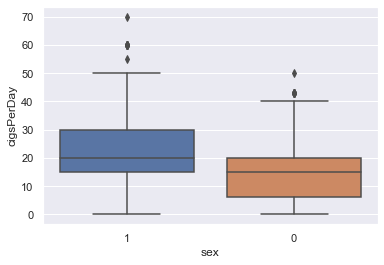

In [46]:
sns.boxplot(data=df[df['currentSmoker']==1], y='cigsPerDay', x='sex')

The variable 'cigsPerDay' is having **discrete distribution** and is heavily right-skewed. There is **gender differences** in distribution as well. 
1. **Categorizing data** - As the variable is having discrete distribution, the binning strategy to stratify smoking scale might be helpful. this strategy will also take care of seemed outliers which in real scenarios are probable values for smoking status in smokers.
2. **Missing Values** - Once the variable is stratified based on smoking scale, the missing values will be imputed as per the association analysis with sex, age and BMI


In [47]:
df[df['cigsPerDay'].isnull()]

,sex,totChol,age,sysBP,diaBP,currentSmoker,cigsPerDay,BMI,diabetes,BPMeds,heartRate,glucose,prevCHD,prevalentAP,prevalentMI,prevalentStroke,prevalentHyp,TenYearCHD
2497,0,206.0,62,242.0,141.0,1,NaN,39.86,0,1.0,80.0,94.0,1,1,0,1,1,0


In [48]:
def strata_(data):
    if data ==0.0:
        return 'nonSmokers'
    elif data in range(1,10):
        return 'mildSmokers'
    elif data in range(10,20):
        return 'moderateSmokers'
    elif pd.isna(data):
        return np.nan
    else: #>=20
        return 'heavySmokers'
df['cat_cigsPerDay'] = df['cigsPerDay'].apply(strata_)
df['cat_cigsPerDay']=df['cat_cigsPerDay'].astype('category')


In [49]:
df = df.dropna(axis=0, subset=['cat_cigsPerDay'])

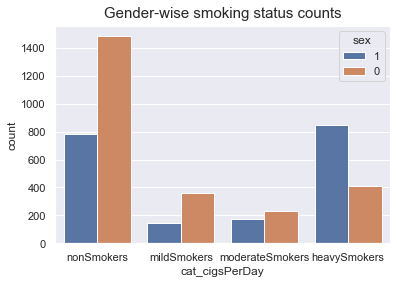

In [50]:
# Gender-wise countplot
p = sns.countplot(data=df, x='cat_cigsPerDay',
                  order=['nonSmokers','mildSmokers','moderateSmokers','heavySmokers'], hue='sex' )
p.set_title('Gender-wise smoking status counts', fontsize=15,y=1.01)
plt.show()

<AxesSubplot:xlabel='cat_cigsPerDay', ylabel='count'>

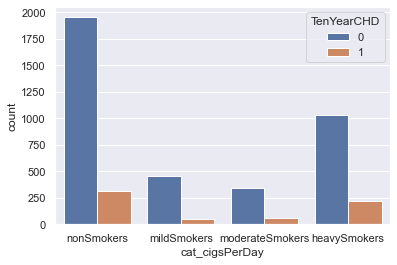

In [51]:
sns.countplot(data=df, x='cat_cigsPerDay',hue='TenYearCHD',
              order=['nonSmokers','mildSmokers','moderateSmokers','heavySmokers'] )


In [52]:
df.drop('cigsPerDay', axis=1, inplace=True)

/Users/shekhar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
cont_att.remove('cigsPerDay')
categorical_att.append('cat_cigsPerDay')

### Data Distribution and Outliers Analysis -  Numerical Variables  
- **Age** : The age is having continous distribution with nearly normal distribution in range of 32 to 70 years with mean age of 49.58 years  
- **Cigs Per Day** - The variable is having discreet distribution with multiple peaks. As it can not be considered as continuous variable and can affect the classifier performance, we decided to group the participants into four smoking status categories based on number of cigs smoked per day    
>> 1. No Smoking (0 cigs per day)    
>> 2. Low Smoking (<10 cigs per day)  
>> 3. Medium Smoking (<20 cigs per day)  
>> 4. Heavy Smoking (> = 20 cigs per day)  
- **Other Numerical Variables** : Total Cholesterol, Systolic and Diastolic BP, BMI, Heart Rate are having nearly normal distribution with **right-skewed distribution**. Glucose levels are having heavy right-skewed distribution with long right tail.  
- **Outliers Detection** :  
> **Box and whisker plots** which graphically describes spread of numerical data through their quartiles are oberved for all numerical variables. The data points beyond the whiskers are identified as outliers  
> **Bivariate scatter plots** are also oberved for each pair of numerical variables to diagnose outliers  
>> 1. Outliers are detected in all numerical variables except for age. Glucose is having highest number of outliers   
>> 2. **Outliers Removal** :Total 7 records were deleted with total cholesterol >500, sysBP >275, BMI >50, and heartRate >135  
>>> As per graphical plots, data points with above defined value cut-offs were found outside of clusters on bivariate scatter plots     
>> 3. **Reason to not remove all outliers** - As given clinical data is very small subset of population data, in real scenarios there are fair chances of observing the provided data values. Also these clinical attributes are having right skewed but near to normal distribution which with normality check can be **transformed (logarithmic or box-cox transformations) to more normal distribution** that represents population distribution and would take care of outliers while applying ML models

## 5. Missing Values and Imputation

In [54]:
# Checking percentage of records with missing values
np.round_((df.isnull().sum()*100)/(df.shape[0]),decimals = 2)

sex                0.00
totChol            0.34
age                0.00
sysBP              0.00
diaBP              0.00
currentSmoker      0.00
BMI                0.32
diabetes           0.00
BPMeds             0.20
heartRate          0.00
glucose            1.54
prevCHD            0.00
prevalentAP        0.00
prevalentMI        0.00
prevalentStroke    0.00
prevalentHyp       0.00
TenYearCHD         0.00
cat_cigsPerDay     0.00
dtype: float64

**Columns with Missing Values** -    
> BP Medication **0.20%**  
> Total Cholesterol **0.34%**  
> BMI **0.32%**  
> Serum Glucose level **1.54%**

In [55]:
# df = df.dropna(axis=0, subset=['BPMeds','totChol','BMI','glucose'])

In [56]:
# df.info()

### Imputation - BPMeds

In [57]:
df['BPMeds'].isnull().sum()

9

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

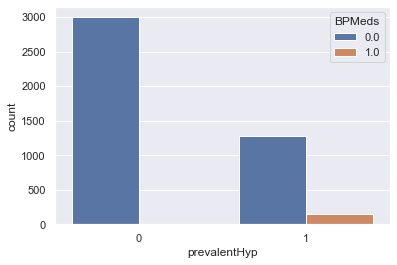

In [58]:
sns.countplot(data=df, x='prevalentHyp', hue='BPMeds')

<AxesSubplot:xlabel='sex', ylabel='count'>

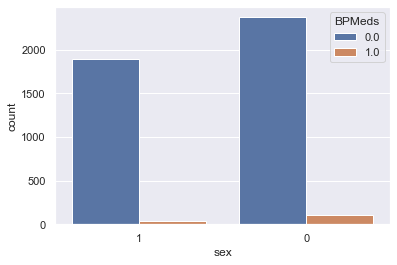

In [59]:
sns.countplot(data=df, x='sex', hue='BPMeds')

In [60]:
df.groupby(['prevalentHyp'])['BPMeds'].apply(lambda x: x.isnull().sum())

prevalentHyp
0    5
1    4
Name: BPMeds, dtype: int64

In [61]:
df.loc[df['prevalentHyp']==0,'BPMeds']=df.loc[df['prevalentHyp']==0,'BPMeds'].fillna(0.0)

/Users/shekhar/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [62]:
df = df.dropna(axis=0, subset=['BPMeds'])

In [63]:
df.shape

(4422, 18)

In [64]:
# df.groupby('TenYearCHD').size().plot(kind='pie', autopct='%.2f')

### Imputation - totChol

In [65]:
df['totChol'].isnull().sum()

15

<AxesSubplot:xlabel='sex', ylabel='totChol'>

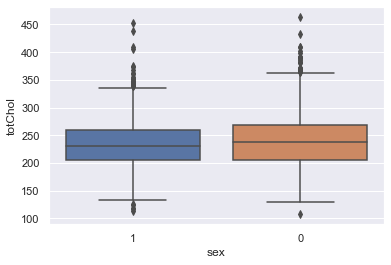

In [66]:
sns.boxplot(data=df, y ='totChol', x='sex')

In [67]:
df['totChol'] = df['totChol'].fillna(df.groupby('sex')['totChol'].transform('median'))
# df = df.dropna(axis=0, subset=['totChol'])

In [68]:
df['totChol'].isnull().sum()

0

In [69]:
# df.groupby('TenYearCHD').size().plot(kind='pie', autopct='%.2f')

### Imputation - BMI

In [70]:
df['BMI'].isnull().sum()

14

In [71]:
df.groupby('sex')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
1,1938.0,26.172281,3.407719,15.54,23.97,26.080,28.3275,40.38
0,2470.0,25.553868,4.461968,15.96,22.54,24.815,27.7800,45.80


<AxesSubplot:xlabel='sex', ylabel='BMI'>

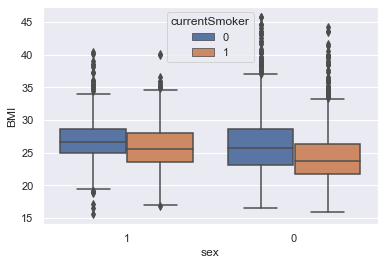

In [72]:
sns.boxplot(data=df, x= 'sex',y='BMI', hue='currentSmoker')

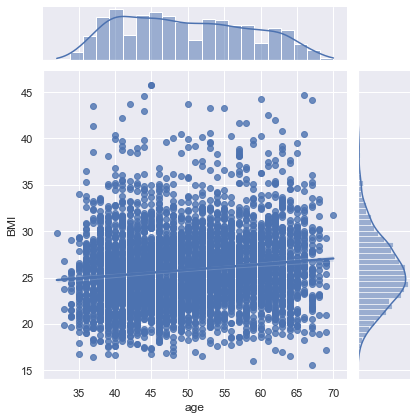

In [73]:
# df.plot.scatter(x='age', y='BMI')
sns.jointplot(data=df, x="age", y="BMI",kind="reg")

In [74]:
df['BMI'] = df['BMI'].fillna(df.groupby(['sex','currentSmoker'])['BMI'].transform('median'))

In [75]:
df['BMI'].isnull().sum()

0

In [76]:
#df = df.dropna(axis=0, subset=['BMI'])

In [77]:
df['heartRate'].isnull().sum()

0

In [78]:
df[df['heartRate'].isnull()]

,sex,totChol,age,sysBP,diaBP,currentSmoker,BMI,diabetes,BPMeds,heartRate,glucose,prevCHD,prevalentAP,prevalentMI,prevalentStroke,prevalentHyp,TenYearCHD,cat_cigsPerDay


<AxesSubplot:xlabel='prevalentHyp', ylabel='heartRate'>

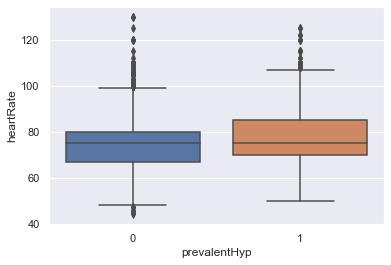

In [79]:
sns.boxplot(data=df, x= 'prevalentHyp',y='heartRate')

<AxesSubplot:xlabel='sex', ylabel='heartRate'>

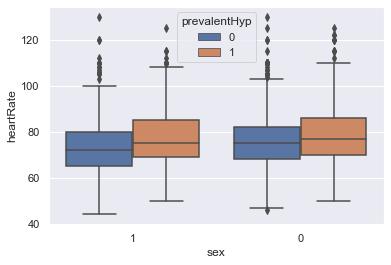

In [80]:
sns.boxplot(data=df, x= 'sex',y='heartRate', hue='prevalentHyp')

In [81]:
df['heartRate'] = df['heartRate'].fillna(df.groupby(['sex','prevalentHyp'])['heartRate'].transform('median'))

### Imputation - glucose

In [82]:
df['glucose'].isnull().sum()

68

In [83]:
df.groupby(['diabetes'])['glucose'].apply(lambda x: x.isnull().sum())

diabetes
0    66
1     2
Name: glucose, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='glucose'>

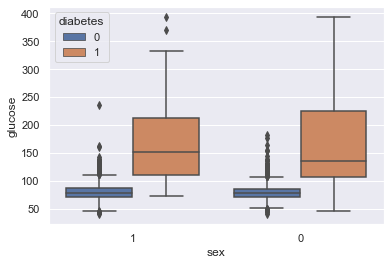

In [84]:
sns.boxplot(data=df, x= 'sex',y='glucose', hue='diabetes')

<AxesSubplot:xlabel='glucose', ylabel='Count'>

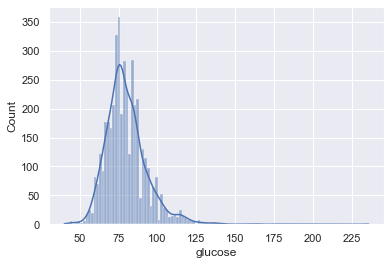

In [85]:
sns.histplot(df[df.diabetes==0], x="glucose", kde=True)

<AxesSubplot:xlabel='glucose', ylabel='Count'>

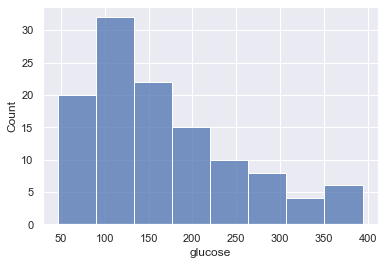

In [86]:
sns.histplot(df[df.diabetes==1], x="glucose")

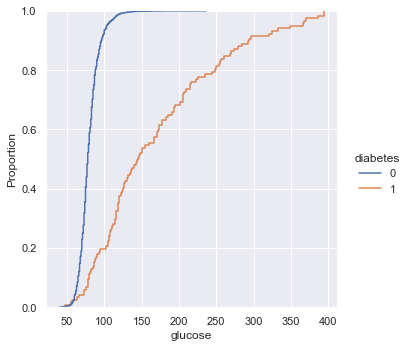

In [87]:
sns.displot(df, x="glucose", hue="diabetes", kind="ecdf")

In [88]:
df.groupby(['sex','diabetes'])['glucose'].median()

sex  diabetes
1    0            78.0
     1           152.5
0    0            78.0
     1           136.0
Name: glucose, dtype: float64

In [89]:
df['glucose'] = df['glucose'].fillna(df.groupby(['sex','diabetes'])['glucose'].transform('median'))
# df = df.dropna(axis=0, subset=['glucose'])

In [90]:
df.isnull().sum().any()

False

<AxesSubplot:ylabel='None'>

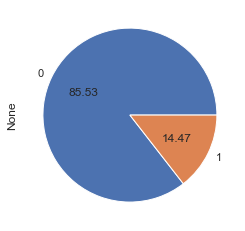

In [93]:
df.groupby('TenYearCHD').size().plot(kind='pie', autopct='%.2f')

In [91]:
df.head()

,sex,totChol,age,sysBP,diaBP,currentSmoker,BMI,diabetes,BPMeds,heartRate,glucose,prevCHD,prevalentAP,prevalentMI,prevalentStroke,prevalentHyp,TenYearCHD,cat_cigsPerDay
0,1,195.0,39,106.0,70.0,0,26.97,0,0.0,80.0,77.0,0,0,0,0,0,0,nonSmokers
2,0,250.0,46,121.0,81.0,0,28.73,0,0.0,95.0,76.0,0,0,0,0,0,0,nonSmokers
5,1,245.0,48,127.5,80.0,1,25.34,0,0.0,75.0,70.0,0,0,0,0,0,0,heavySmokers
7,0,225.0,61,150.0,95.0,1,28.58,0,0.0,65.0,103.0,0,0,0,0,1,1,heavySmokers
9,0,285.0,46,130.0,84.0,1,23.10,0,0.0,85.0,85.0,0,0,0,0,0,0,heavySmokers


## Missing Values Analysis and Imputation  

- **Columns with Missing Values (%)** -  
|Variable Name|Missing Count (percentage)|
|-------------|--------------------------|
|BP Medication |**0.20%**|
|Total Cholesterol| **0.34%**|
|BMI |**0.32%**|
|Serum Glucose level| **1.54%**|

- **Imputation Done** -  


|Variable Name|Imputation Techniques|Records Deletion|Additional Info|
|-------------|---------------------|----------------|-----------|
|BP Medication |Imputation with 0 value in group **not** having history of prevalent hypertension|Records deleted with missing values in group having h/o prevalent hypertension|For binary variable, imputation will create bias in group with h/o prevalent hypertension|
|Total Cholesterol|Imputation with **median**|None|(Not missing at random. Imputation might add bias to estimates) |
|BMI |Imputation with **median**|None|Data was **grouped by sex and current smoking** to get median as BMI is observed to decrease in smokers|
|Serum Glucose level|Imputation with **median**|None|Data was **grouped by sex and diabetes** as the spread differences were observed in groups. Imputation might add bias in estimates for the skewed data with Not missing at random |

- Imputation with median technique is used as median is least affected by outliers than mean

- For every imputation technique to decide, the spread of the measures are oberved against clinically relevent measures as mentioned in imputation table above


Smoker scale reference: [Link to publication](https://pubmed.ncbi.nlm.nih.gov/24297807 "Link to publication")

## 6. Correlation Analysis

In [94]:
print('Categorical Variables: ',categorical_att)
print('Continuous Variables: ',cont_att)

Categorical Variables:  ['sex', 'currentSmoker', 'BPMeds', 'diabetes', 'prevCHD', 'prevalentAP', 'prevalentMI', 'prevalentStroke', 'prevalentHyp', 'TenYearCHD', 'cat_cigsPerDay']
Continuous Variables:  ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


Text(0.5, 1.01, 'Continuous Variables - Pearson Correlation Matrix')

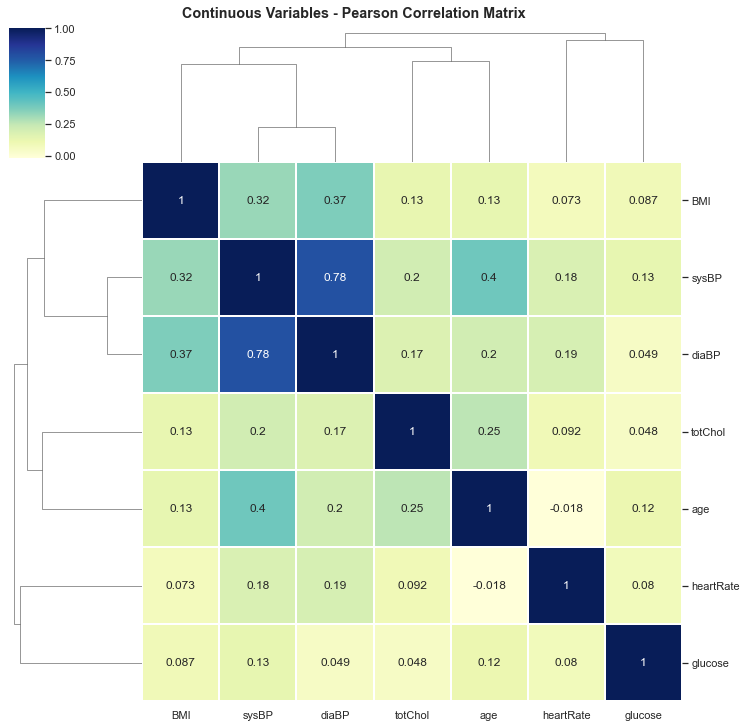

In [95]:
# Pearson correlation stats for continuous variables

cg = sns.clustermap(df.corr(), cmap ='YlGnBu', linewidths = 0.1, annot=True);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
cg.fig.suptitle('Continuous Variables - Pearson Correlation Matrix',y=1.01, fontweight='bold')

In [96]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
corr = pearsonr(df['sysBP'], df['diaBP'])
print('SYSTOLIC and DIASTOLIC BP - ')
print('Correlation Coefficient : {} and p-value : {}'.format(corr[0], corr[1]))

corr = pearsonr(df['BMI'], df['diaBP'])
print('\nBMI and DIASTOLIC BP - ')
print('Correlation Coefficient : {} and p-value : {}'.format(corr[0], corr[1]))

corr = pearsonr(df['sysBP'], df['age'])
print('\nAGE and SYSTOLIC BP - ')
print('Correlation Coefficient : {} and p-value : {}'.format(corr[0], corr[1]))
      

SYSTOLIC and DIASTOLIC BP - 
Correlation Coefficient : 0.7817360537592019 and p-value : 0.0

BMI and DIASTOLIC BP - 
Correlation Coefficient : 0.36642169046714207 and p-value : 1.366308232155346e-140

AGE and SYSTOLIC BP - 
Correlation Coefficient : 0.3969687973229602 and p-value : 7.824706272194293e-167


In [97]:
enc_dict = {'nonSmokers':0, 'mildSmokers':1, 'moderateSmokers':2, 'heavySmokers':3}
# Create the mapped values in a new column
df['cpd_mapped'] = df['cat_cigsPerDay'].map(enc_dict)
df.head()

,sex,totChol,age,sysBP,diaBP,currentSmoker,BMI,diabetes,BPMeds,heartRate,glucose,prevCHD,prevalentAP,prevalentMI,prevalentStroke,prevalentHyp,TenYearCHD,cat_cigsPerDay,cpd_mapped
0,1,195.0,39,106.0,70.0,0,26.97,0,0.0,80.0,77.0,0,0,0,0,0,0,nonSmokers,0
2,0,250.0,46,121.0,81.0,0,28.73,0,0.0,95.0,76.0,0,0,0,0,0,0,nonSmokers,0
5,1,245.0,48,127.5,80.0,1,25.34,0,0.0,75.0,70.0,0,0,0,0,0,0,heavySmokers,3
7,0,225.0,61,150.0,95.0,1,28.58,0,0.0,65.0,103.0,0,0,0,0,1,1,heavySmokers,3
9,0,285.0,46,130.0,84.0,1,23.10,0,0.0,85.0,85.0,0,0,0,0,0,0,heavySmokers,3


In [98]:
categorical_att.remove('cat_cigsPerDay')
categorical_att.append('cpd_mapped')

In [99]:
# point biserial correlation between categorical and continuous variables

from scipy.stats import pointbiserialr
print(categorical_att)
# values=[[0]*len(categorical_att)]*len(cont_att)
values=np.zeros((len(cont_att),len(categorical_att)))
for i,x in enumerate(cont_att):
    for j,y in enumerate(categorical_att):
        # print(y,x)
        pbc = pointbiserialr(df[y], df[x])
        values[i][j]=pbc[0]
        # print(values[i][j])

['sex', 'currentSmoker', 'BPMeds', 'diabetes', 'prevCHD', 'prevalentAP', 'prevalentMI', 'prevalentStroke', 'prevalentHyp', 'TenYearCHD', 'cpd_mapped']


Text(0.5, 1.01, 'Point Biserial Correlation between categorical and continuous variables')

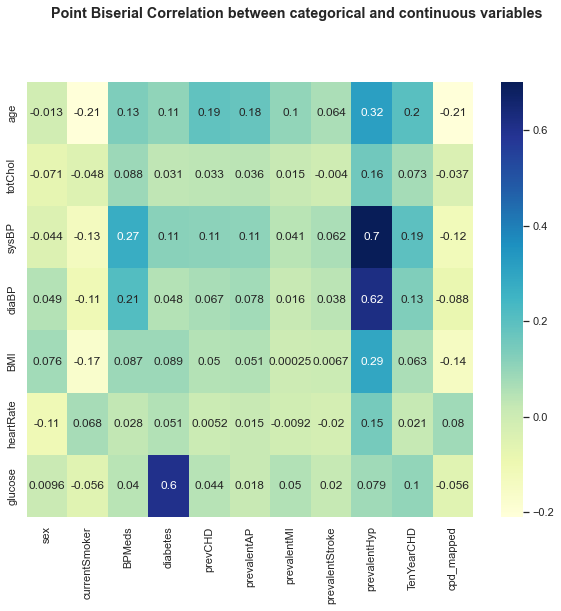

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(values,xticklabels=categorical_att, yticklabels=cont_att, annot=True, cmap='YlGnBu')
fig.suptitle('Point Biserial Correlation between categorical and continuous variables', y=1.01, fontweight='bold')

Text(0.5, 1.01, 'Corrected Cramer’s V measure of association - Categorical Variables')

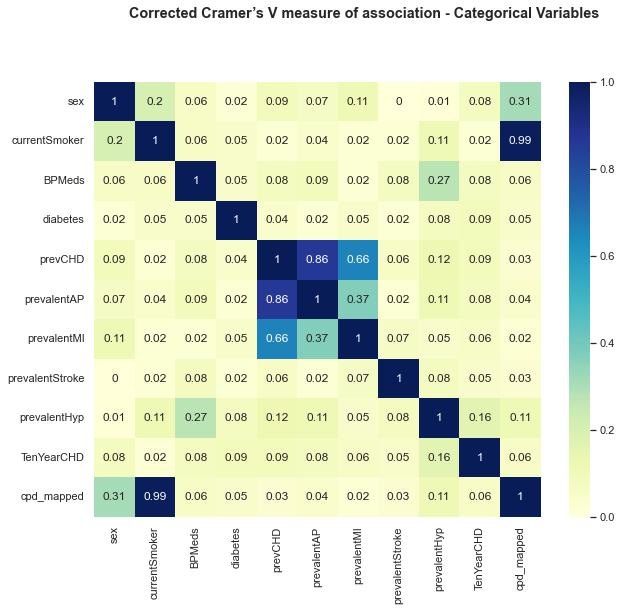

In [101]:
# Corrected Cramer’s V measure of association - Categorical Variables

from scipy.stats.contingency import association

rows= []

for var1 in df[categorical_att]:
    col = []
    for var2 in df[categorical_att]:
        crosstab =np.array(pd.crosstab(df[var1],df[var2], rownames=None, colnames=None))
        col.append(round(association(np.array(crosstab), method="cramer"),2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
    
cramers_results = np.array(rows)
results = pd.DataFrame(cramers_results, columns = categorical_att, index =categorical_att)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(results, annot=True, cmap='YlGnBu')
fig.suptitle('Corrected Cramer’s V measure of association - Categorical Variables', fontweight='bold', y=1.01)


In [102]:
df.drop('currentSmoker',axis=1,inplace=True)
categorical_att.remove('currentSmoker')

In [103]:
df.drop('cpd_mapped',axis=1,inplace=True)

In [104]:
df.drop('prevCHD',axis=1,inplace=True)

## Correlation Analysis:  

> In our dataset, there are two kinds of variables — continuous and categorical (also called discrete) and hence, we need different metrics which can quantify correlation or association between continuous-continuous, categorical-categorical and categorical-continuous variable pairs  
> 1. **Correlation between two continuous variables**  
>> **Pearson correlation coefficient** as the measure of association is used.  
>>**Obesrvations** -  
>> 1. Systolic and diastolic BP are oberved to be 78% positively correlated which is in line with *clinical relation* of both parts of Blood Pressure measurement values.  
>> 2. Weak positive correlation is observed between BMI with systolic and diastolic BP, and between age and systolic BP.  
> 2. **Correlation between continuous and categorical variables**  
>> **Point Biserial Correlation** as the measure of association is used.  
>> **Observations** -  
>> 1. Prevalent hypertension and BP measures show moderate positive correlation (62 and 70%) which can be explained with clinical association i.e increased blood pressure in un-treated or not under control hypertensive patients  
>> 2. Similarly diabetes and serum glucose levels have shown moderate positive correlation at 62% which reflects the clinical relation itself.
> 3. **Correlation between categorical variables**  
>> **Corrected Cramér’s V Correlation** as the measure of association is used.  
>> **Observations** -  
>> 1. Current smoking and smokers scale (based on cig per day) are oberved to show strong positive correlation. It reflects the absence of current smoking with presence of other and we can thus elimiate current smokers variable as *0 value (absence of) of mild, moderate and heavy smokers correspond to 0 value (absence of) current smoking.*  
>> 2. Prevalent AP and prevalent MI are having strong correlation with prevalent CHD as Prevalent Coronary Heart Disease id defined as pre-existing Angina Pectoris (AP), Myocardial Infarction (MI) (hospitalized, silent or unrecognized), or Coronary Insufficiency (unstable angina) 

## 7. Normality Check

In [105]:
def normality_check(data):
    fig = plt.figure(figsize=(12,10))
    ax1 = fig.add_subplot(311)
    x = data
    prob = stats.probplot(x,dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Probplot against normal distribution')

    ax2 = fig.add_subplot(312)
    xl = np.log(x)
    prob = stats.probplot(xl,dist=stats.norm, plot=ax2)
    ax2.set_title('Probplot after Log transformation')

    ax3 = fig.add_subplot(313)
    xt, _ = stats.boxcox(x)
    prob = stats.probplot(xt,dist=stats.norm, plot=ax3)
    ax2.set_title('Probplot after Box-Cox transformation')
    
    fig.suptitle('Distribution check before and after transformation - "{}"'.format(data.name),fontweight='bold',fontsize=16)

    plt.show()

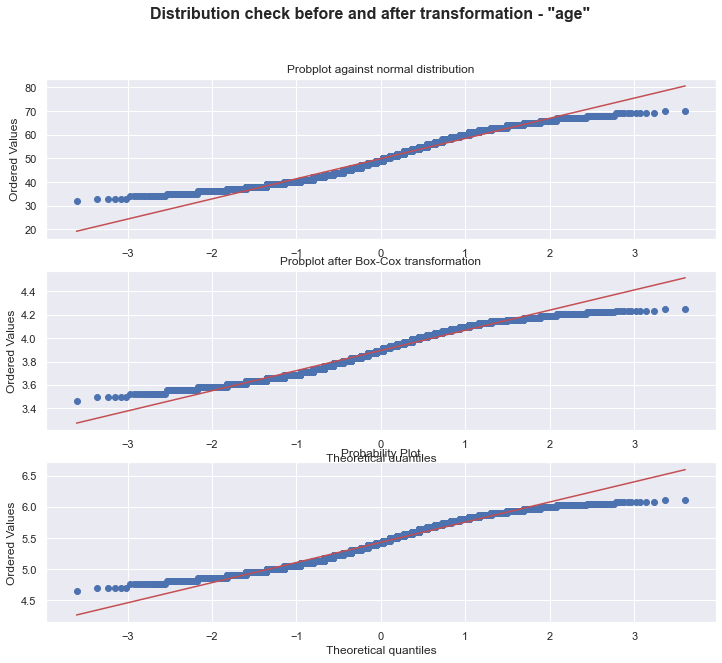

In [106]:
normality_check(df['age'])

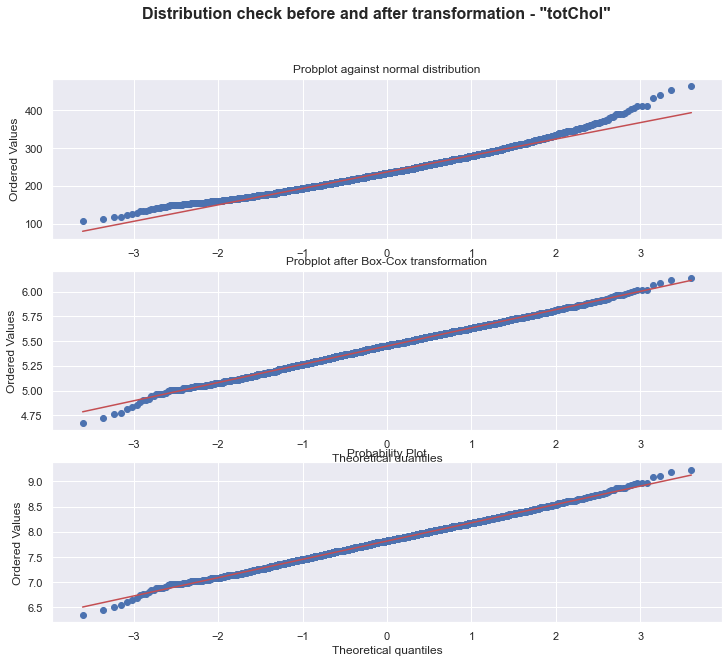

In [107]:
normality_check(df['totChol'])

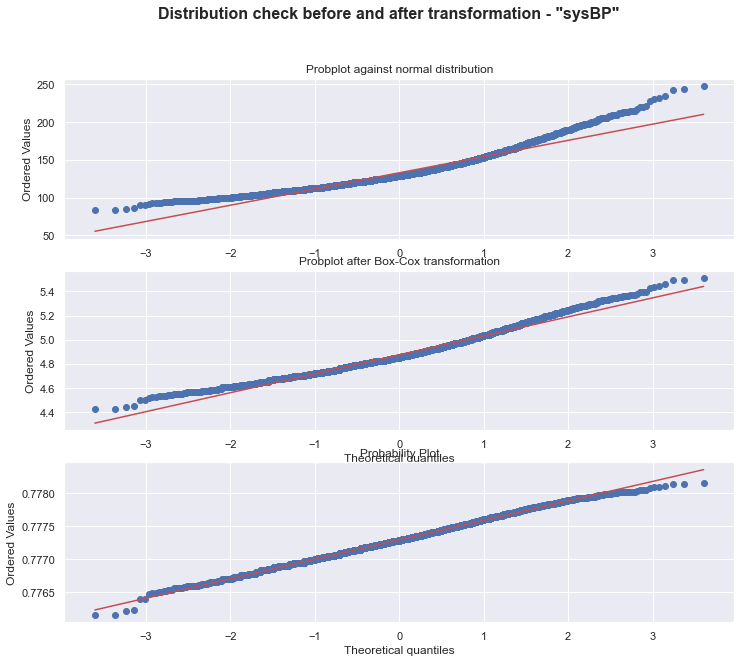

In [108]:
normality_check(df['sysBP'])

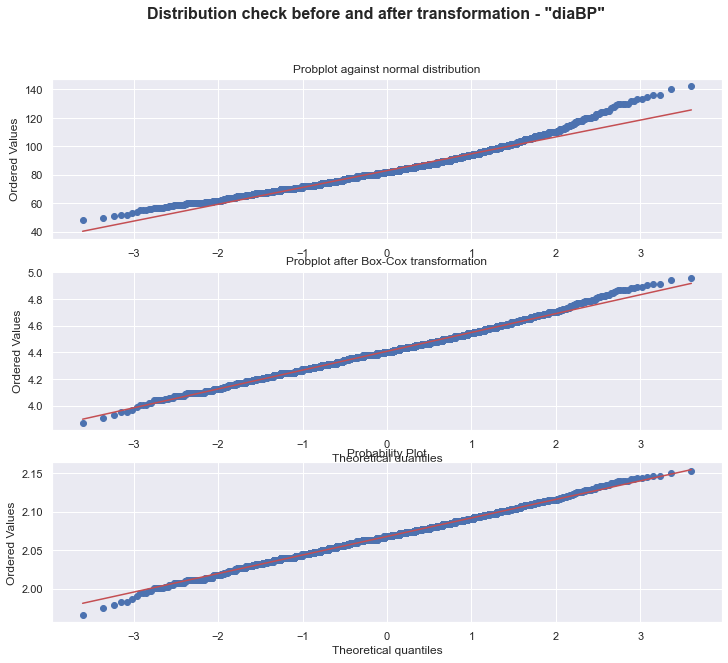

In [109]:
normality_check(df['diaBP'])

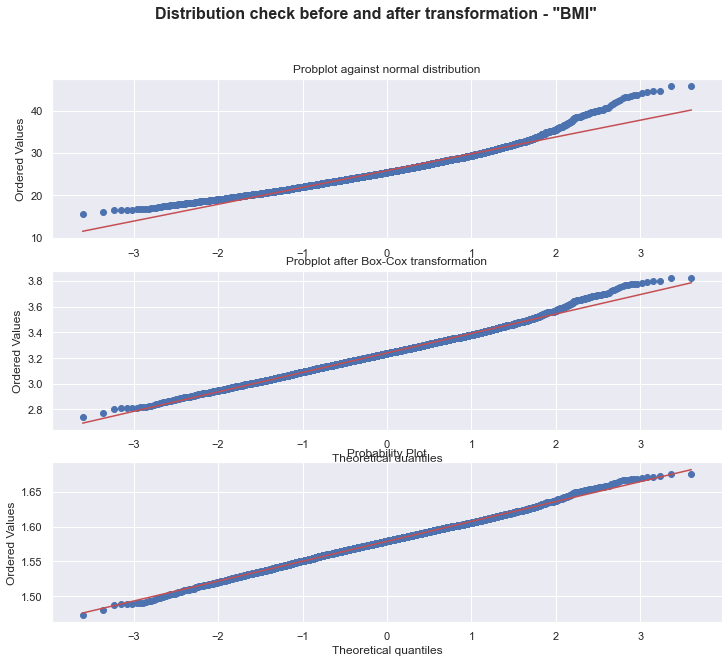

In [110]:
normality_check(df['BMI'])

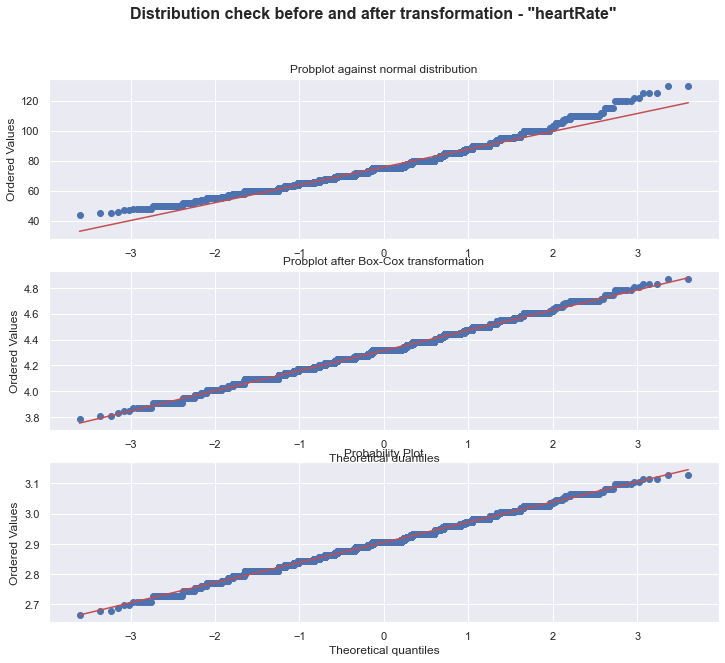

In [111]:
normality_check(df['heartRate'])

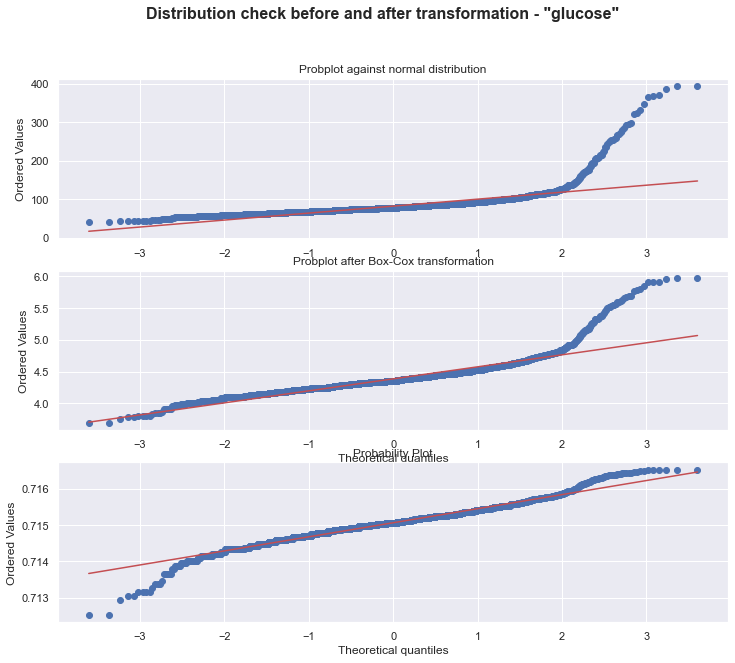

In [112]:
normality_check(df['glucose'])

<AxesSubplot:ylabel='None'>

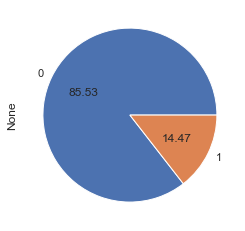

In [113]:
df.groupby('TenYearCHD').size().plot(kind='pie', autopct='%.2f')

## 8. Undersampling Data - Imbalanced Target Variable

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4422 entries, 0 to 11624
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              4422 non-null   category
 1   totChol          4422 non-null   float64 
 2   age              4422 non-null   int64   
 3   sysBP            4422 non-null   float64 
 4   diaBP            4422 non-null   float64 
 5   BMI              4422 non-null   float64 
 6   diabetes         4422 non-null   category
 7   BPMeds           4422 non-null   category
 8   heartRate        4422 non-null   float64 
 9   glucose          4422 non-null   float64 
 10  prevalentAP      4422 non-null   category
 11  prevalentMI      4422 non-null   category
 12  prevalentStroke  4422 non-null   category
 13  prevalentHyp     4422 non-null   category
 14  TenYearCHD       4422 non-null   category
 15  cat_cigsPerDay   4422 non-null   category
dtypes: category(9), float64(6), int64(1)
memo

**Dummy Columns** (Grouped cigsPerDay variable)-  
1. Creating dummy columns for encoded grouped cigsPerDay (cat_cigsPerDay) variable 
2. Dropping dummy column with 'no' value as it is represented by all 0 values across other dummy columns
3. Dropping cigsPerDay and encoded grouped varibale (cat_cigsPerDay)  

In [115]:
cpd_dummies = pd.get_dummies(df['cat_cigsPerDay'])
cpd_dummies.drop(['nonSmokers'], axis=1, inplace=True)
df = pd.concat([df, cpd_dummies], axis=1)
df.drop(['cat_cigsPerDay'], axis=1, inplace=True)
df[['mildSmokers','moderateSmokers','heavySmokers']]=df[['mildSmokers','moderateSmokers','heavySmokers']].astype('category')
df.head()

,sex,totChol,age,sysBP,diaBP,BMI,diabetes,BPMeds,heartRate,glucose,prevalentAP,prevalentMI,prevalentStroke,prevalentHyp,TenYearCHD,heavySmokers,mildSmokers,moderateSmokers
0,1,195.0,39,106.0,70.0,26.97,0,0.0,80.0,77.0,0,0,0,0,0,0,0,0
2,0,250.0,46,121.0,81.0,28.73,0,0.0,95.0,76.0,0,0,0,0,0,0,0,0
5,1,245.0,48,127.5,80.0,25.34,0,0.0,75.0,70.0,0,0,0,0,0,1,0,0
7,0,225.0,61,150.0,95.0,28.58,0,0.0,65.0,103.0,0,0,0,1,1,1,0,0
9,0,285.0,46,130.0,84.0,23.10,0,0.0,85.0,85.0,0,0,0,0,0,1,0,0


In [116]:
df.TenYearCHD.value_counts()

0    3782
1     640
Name: TenYearCHD, dtype: int64

In [117]:
df.head()

,sex,totChol,age,sysBP,diaBP,BMI,diabetes,BPMeds,heartRate,glucose,prevalentAP,prevalentMI,prevalentStroke,prevalentHyp,TenYearCHD,heavySmokers,mildSmokers,moderateSmokers
0,1,195.0,39,106.0,70.0,26.97,0,0.0,80.0,77.0,0,0,0,0,0,0,0,0
2,0,250.0,46,121.0,81.0,28.73,0,0.0,95.0,76.0,0,0,0,0,0,0,0,0
5,1,245.0,48,127.5,80.0,25.34,0,0.0,75.0,70.0,0,0,0,0,0,1,0,0
7,0,225.0,61,150.0,95.0,28.58,0,0.0,65.0,103.0,0,0,0,1,1,1,0,0
9,0,285.0,46,130.0,84.0,23.10,0,0.0,85.0,85.0,0,0,0,0,0,1,0,0


In [118]:
# Shuffle df
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=650,random_state=42)

# Concatenate both dataframes again
balanced_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
balanced_df.TenYearCHD.value_counts()

0    650
1    640
Name: TenYearCHD, dtype: int64

In [120]:
y = balanced_df['TenYearCHD']
X = balanced_df.drop(['TenYearCHD'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=23, stratify=y )

In [121]:
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(903, 17) (387, 17) (903,) (387,)


In [122]:
cols = X_train.columns

In [123]:
X_train.shape[1]

17

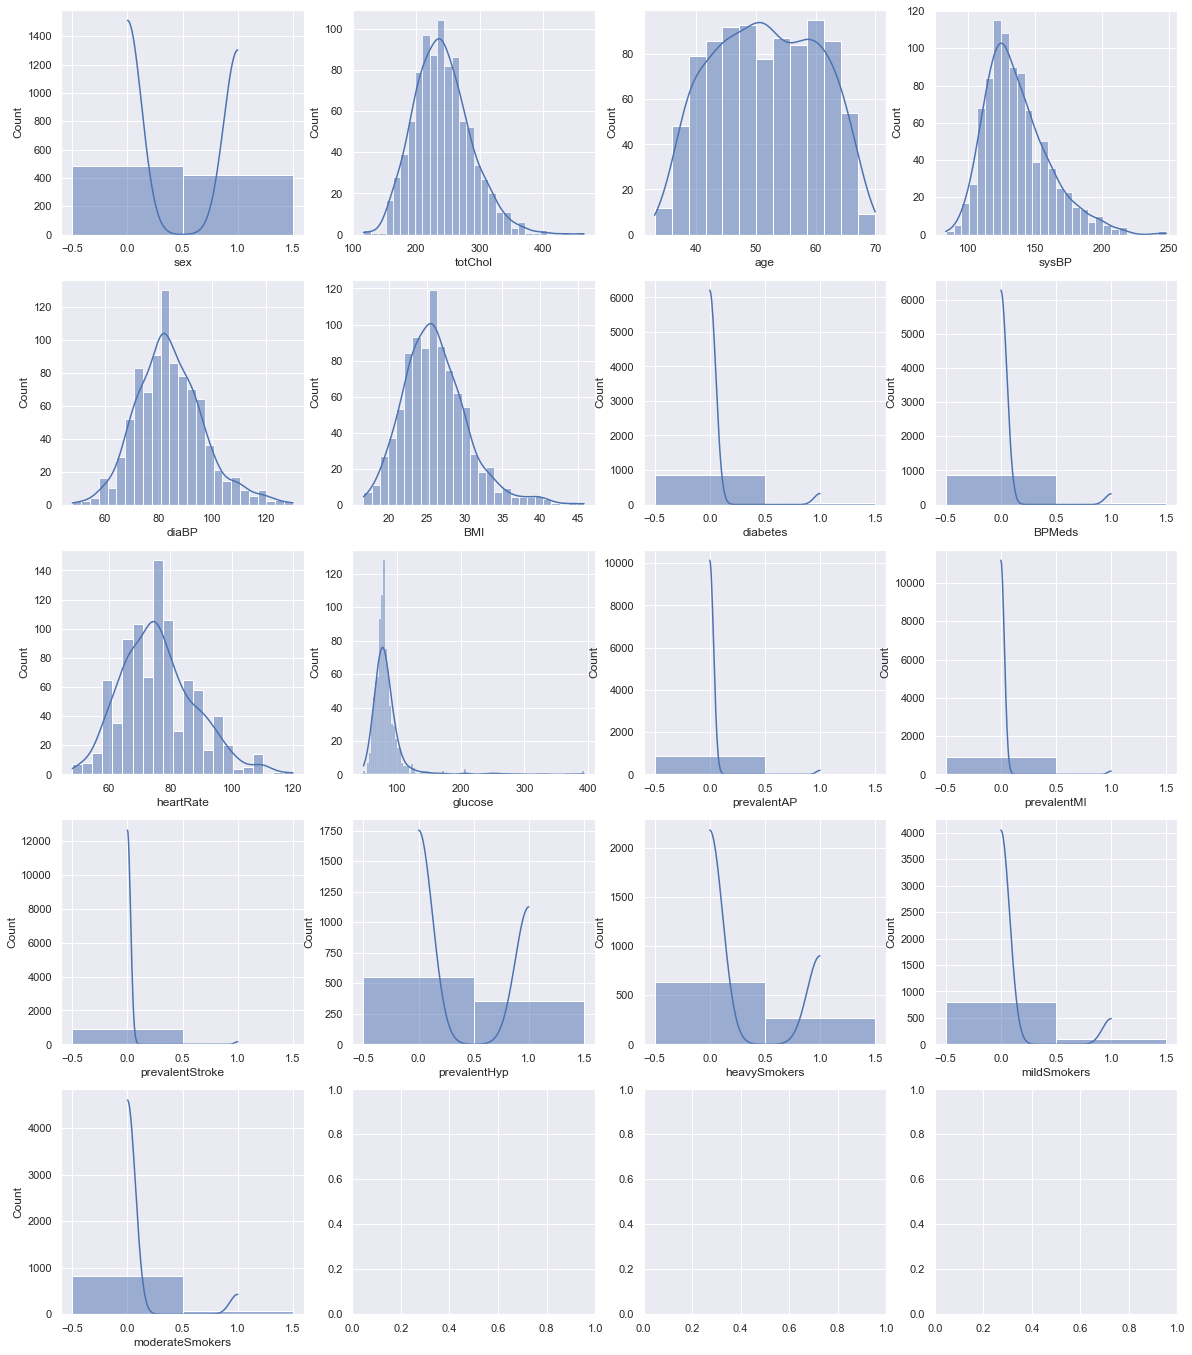

In [124]:
fig, ax = plt.subplots(5,4, figsize=(20,24))
i=0
j=0
for col in cols:
    sns.histplot(X_train[col], kde=True, ax=ax[i,j])
    if j==3:
        i+=1
        j=0
    else:
        j+=1
    
plt.show()

## Undersampling:  
- Our data set has only 14% of positive class with negative class overrepresented.
- If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like our algorithm is achieving superb results (high accuracy) when, in reality, it is simply always predicting the majority class.
- With the highly imbalanced data, accuracy and the ROC-AUC curve would be worst measure for the model performance evaluation.  
- Undersampling aims to decrease the number of instances from the overrepresented class in the data set.
- **Method Implemented** - The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.

## 9. Transformation Pipeline

In [125]:
numerical_cols = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
column_index = []
for col in numerical_cols:
    column_index.append(X_train.columns.get_loc(col))
    

normalizer = ColumnTransformer([('norm', PowerTransformer(method='box-cox'), column_index),],
                               remainder='passthrough'
                              )

scaler = ColumnTransformer([('scale', StandardScaler(), column_index)],
                           remainder='passthrough')
# col_index = X_train.columns.get_loc('cat_cigsPerDay')

# encoder = ColumnTransformer([('enc', OneHotEncoder(handle_unknown="ignore"), [col_index])])
pipe = Pipeline(steps = [('normalizer', normalizer), ('scaler', scaler)])


In [126]:
# def classification_report_scorer(clf, X, y):
#     y_pred = clf.predict(X)
#     cm = classification_report(y, y_pred, output_dict=True)
#     fbeta = fbeta_score(y,y_pred, beta=2,average='weighted')
#     matthews = matthews_corrcoef(y, y_pred)
#     return {'prec_0': cm['0']['precision'], 'rec_0': cm['0']['recall'], 'fscore_0': cm['0']['f1-score'], 
#             'prec_1':cm['1']['precision'], 'rec_1': cm['1']['recall'], 'fscore_1': cm['1']['f1-score'], 
#             'acc': cm['accuracy'], 'fbeta':fbeta, 'matthews' : matthews}

In [127]:
def classification_report_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = classification_report(y, y_pred, output_dict=True)
    # f1score_0 = f1_score(y, y_pred, pos_label=0)
    # f1score_1 = f1_score(y, y_pred, pos_label=1)
    fbeta_0 = fbeta_score(y,y_pred, beta=2,pos_label=0)
    fbeta_1 = fbeta_score(y,y_pred, beta=2,pos_label=1)
    matthews = matthews_corrcoef(y, y_pred)
    return {'fbeta_0':fbeta_0, 'fbeta_1':fbeta_1, 'matthews' : matthews}

## 10. Modeling

### 10.1 KNN Model

#### Hyperparameter tuning - KNN

In [128]:
# k value tuning
from sklearn import set_config
mean_acc = np.zeros(25)
for i in range(1,21):
    #Train Model and Predict  
    classifier = KNeighborsClassifier(n_neighbors = i)
    full_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)])
    # Display Pipeline
    set_config(display='diagram')
    knn = full_pipeline.fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = accuracy_score(y_test, yhat)

mean_acc

array([0.53488372, 0.56072351, 0.57881137, 0.57881137, 0.59173127,
       0.57622739, 0.60723514, 0.60723514, 0.6124031 , 0.61498708,
       0.6124031 , 0.6124031 , 0.61757106, 0.62015504, 0.63049096,
       0.62790698, 0.61757106, 0.60723514, 0.6124031 , 0.61498708,
       0.        , 0.        , 0.        , 0.        , 0.        ])

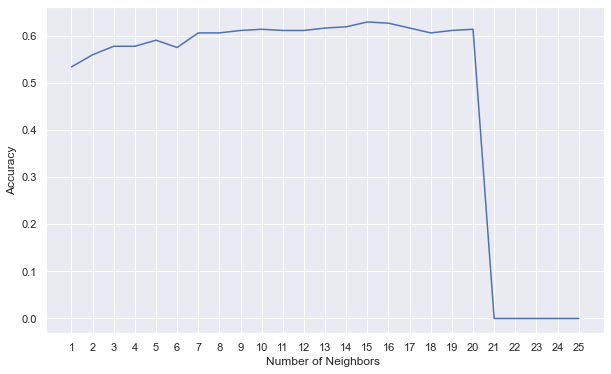

In [129]:
loc = np.arange(1,26,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,26), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [130]:
np.seterr(divide = 'ignore')
grid_params = { 'model__n_neighbors' : [8,10,13,15,18,20]}

classifier = KNeighborsClassifier()
full_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)])

gs = GridSearchCV(full_pipeline, grid_params, refit = 'fbeta_1',
                  scoring =classification_report_scorer,
                  verbose = 1, cv=3, n_jobs = -1)

In [131]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [132]:
g_res.best_score_

0.6415321464376715

In [133]:
g_res.best_params_

{'model__n_neighbors': 13}

#### KNN with hypertuned hyperparameters

In [165]:
classifier = KNeighborsClassifier(n_neighbors = 13)
knn_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)], verbose=True)
knn_pipeline.fit(X_train, y_train)

[Pipeline] .......... (step 1 of 2) Processing pipeline, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('normalizer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('norm',
                                                                   PowerTransformer(method='box-cox'),
                                                                   [2, 1, 3, 4,
                                                                    5, 8,
                                                                    9])])),
                                 ('scaler',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   [2, 1, 3, 4,
                                                                    5, 8,
                                                                    9])]))])),
                ('model', KNeighborsClassifier(n_neighbors=13))],
         verbose=True)

In [166]:
y_hat = knn_pipeline.predict(X_train)
y_knn = knn_pipeline.predict(X_test)

CLASSIFICATION REPORT (TEST SET): 
               precision    recall  f1-score   support

           0       0.62      0.64      0.63       195
           1       0.62      0.59      0.61       192

    accuracy                           0.62       387
   macro avg       0.62      0.62      0.62       387
weighted avg       0.62      0.62      0.62       387

{'fbeta_0': 0.6358087487283826, 'fbeta_1': 0.5987394957983193, 'matthews': 0.23505203990674656}


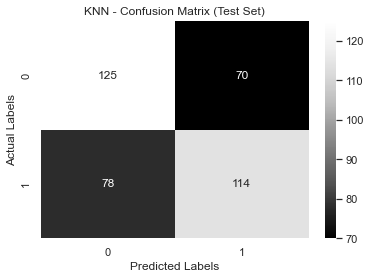

In [167]:
print('CLASSIFICATION REPORT (TEST SET): \n',classification_report(y_test, y_knn))
knn_scores = classification_report_scorer(knn_pipeline, X_test, y_test)

print(knn_scores)

g = sns.heatmap(confusion_matrix(y_test, y_knn), annot=True, cmap='Greys_r', fmt='d')
# g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
g.set(xlabel='Predicted Labels', ylabel='Actual Labels')
g.set_title('KNN - Confusion Matrix (Test Set)')
plt.show()
                                                                                                   

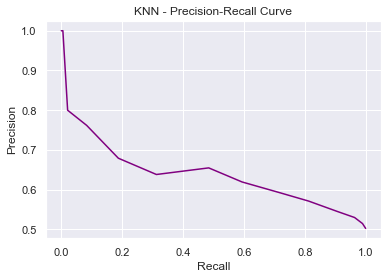

In [168]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
# help(PrecisionRecallDisplay)

precision, recall, _ = precision_recall_curve(y_test, knn_pipeline.predict_proba(X_test)[:,1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('KNN - Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()
# display = PrecisionRecallDisplay.from_estimator(knn_pipeline, X_test, y_test, name="KNN")
# _ = display.ax_.set_title("2-class Precision-Recall curve")

### 10.2 Logistic regression

#### Hyperparameter Tuning

In [138]:
grid_params = {'model__penalty' : ['l2'],
               'model__C' : np.logspace(-4, 4, 20),
               'model__solver' : ['lbfgs','newton-cg','liblinear'],
               'model__max_iter' : [100, 1000, 2500, 5000]
              }

classifier = LogisticRegression()
full_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)])

gs = GridSearchCV(full_pipeline, grid_params, refit = 'f1_weighted',
                  scoring = 'f1_weighted' ,return_train_score=True,
                  verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

print('best score - ',g_res.best_score_)
print('best parameters - ', g_res.best_params_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


/Users/shekhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shekhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

best score -  0.6786466867663928
best parameters -  {'model__C': 11.288378916846883, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [ ]:
4.281332398719396

[Pipeline] .......... (step 1 of 2) Processing pipeline, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s
CLASSIFICATION REPORT (TEST SET): 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       195
           1       0.69      0.69      0.69       192

    accuracy                           0.69       387
   macro avg       0.69      0.69      0.69       387
weighted avg       0.69      0.69      0.69       387

{'fbeta_0': 0.6885919835560121, 'fbeta_1': 0.6912681912681914, 'matthews': 0.3798776743429133}


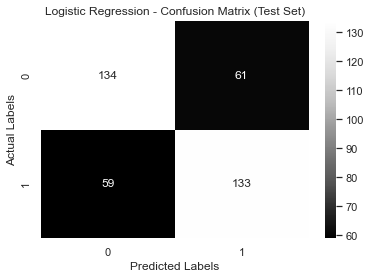

In [163]:
classifier = LogisticRegression(penalty = 'l2', C = 11.288378916846883, solver = 'lbfgs', 
                                max_iter = 100, random_state=40)
log_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)], verbose=True)
log_pipeline.fit(X_train, y_train)

y_hat = log_pipeline.predict(X_train)
y_log = log_pipeline.predict(X_test)

print('CLASSIFICATION REPORT (TEST SET): \n',classification_report(y_test, y_log))
log_scores = classification_report_scorer(log_pipeline, X_test, y_test)

print(log_scores)

g = sns.heatmap(confusion_matrix(y_test, y_log), annot=True, cmap='Greys_r', fmt='d')
# g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
g.set(xlabel='Predicted Labels', ylabel='Actual Labels')
g.set_title('Logistic Regression - Confusion Matrix (Test Set)')
plt.show()

In [140]:
# classifier = LogisticRegression(penalty = 'l2', C = 29.763514416313132, solver = 'lbfgs', 
#                                 max_iter = 100, random_state=40)
# log_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)], verbose=True)
# log_pipeline.fit(X_train, y_train)

# y_hat = log_pipeline.predict(X_train)
# y_log = log_pipeline.predict(X_test)

# print('CLASSIFICATION REPORT (TEST SET): \n',classification_report(y_test, y_log))
# log_scores = classification_report_scorer(log_pipeline, X_test, y_test)

# print(log_scores)

# g = sns.heatmap(confusion_matrix(y_test, y_log), annot=True, cmap='Greys_r', fmt='d')
# # g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
# g.set(xlabel='Predicted Labels', ylabel='Actual Labels')
# g.set_title('Logistic Regression - Confusion Matrix (Test Set)')
# plt.show()

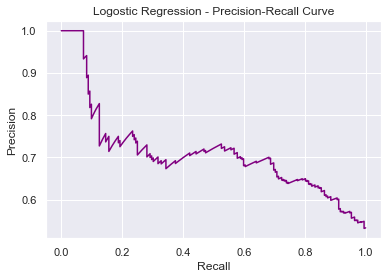

In [141]:
precision, recall, _ = precision_recall_curve(y_test, log_pipeline.predict_proba(X_test)[:,1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Logostic Regression - Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### 10.3 Decision Tree Classifier

#### Hyperparameter tuning

In [142]:
grid_params = {'model__criterion' : ['gini', 'entropy'],
               'model__max_depth' : [2,4,6,8,10,12],
               'model__class_weight' : ['balanced',None]
              }

classifier = DecisionTreeClassifier(random_state=40)
full_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)])

gs = GridSearchCV(full_pipeline, grid_params, refit = 'f1_weighted',
                  scoring ='f1_weighted' ,return_train_score=True,
                  verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

print('best score - ',g_res.best_score_)
print('best parameters - ', g_res.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
best score -  0.6436048119211621
best parameters -  {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 2}


[Pipeline] .......... (step 1 of 2) Processing pipeline, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
CLASSIFICATION REPORT (TEST SET): 
               precision    recall  f1-score   support

           0       0.69      0.54      0.61       195
           1       0.62      0.75      0.68       192

    accuracy                           0.65       387
   macro avg       0.65      0.65      0.64       387
weighted avg       0.65      0.65      0.64       387

{'fbeta_0': 0.5674518201284796, 'fbeta_1': 0.7192807192807193, 'matthews': 0.2998958657282189}


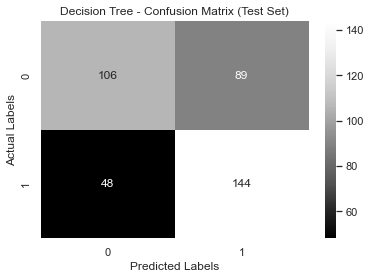

In [143]:
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=2, class_weight='balanced', random_state=40 )
dtr_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)], verbose=True)
dtr_pipeline.fit(X_train, y_train)

y_hat = dtr_pipeline.predict(X_train)
y_dec = dtr_pipeline.predict(X_test)

print('CLASSIFICATION REPORT (TEST SET): \n',classification_report(y_test, y_dec))
dtr_scores = classification_report_scorer(dtr_pipeline, X_test, y_test)

print(dtr_scores)

g = sns.heatmap(confusion_matrix(y_test, y_dec), annot=True, cmap='Greys_r', fmt='d')
# g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
g.set(xlabel='Predicted Labels', ylabel='Actual Labels')
g.set_title('Decision Tree - Confusion Matrix (Test Set)')
plt.show()

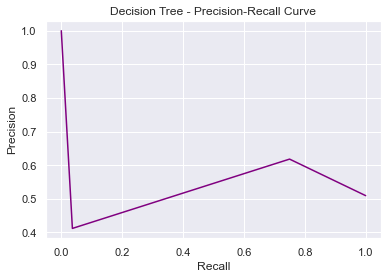

In [144]:
precision, recall, _ = precision_recall_curve(y_test, dtr_pipeline.predict_proba(X_test)[:,1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Decision Tree - Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### 10.4 Random Forest Classifier

#### Hyperparameter tuning

In [145]:
grid_params = {'model__n_estimators': [100, 150, 200, 300],
               'model__criterion' : ['gini', 'entropy'],
               'model__max_depth': [2,4,6,10, None],
               'model__min_samples_split': [2, 5, 10],
               'model__min_samples_leaf': [1, 2, 4],
               'model__max_features': ['auto', 'sqrt',None],
               'model__bootstrap': [True, False]}

classifier = RandomForestClassifier(random_state=40)
full_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)])

gs = GridSearchCV(full_pipeline, grid_params, refit = 'f1',
                  scoring ='f1' ,return_train_score=True,
                  verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

print('best score - ',g_res.best_score_)
print('best parameters - ', g_res.best_params_)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
best score -  0.6839134030362101
best parameters -  {'model__bootstrap': True, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 300}


In [159]:
classifier = RandomForestClassifier(n_estimators=300, criterion='gini',bootstrap= True,
                                    max_depth= 4,min_samples_leaf= 1, max_features='auto',
                                    min_samples_split= 5,random_state=40)
rfr_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)], verbose=True)

rfr_pipeline.fit(X_train, y_train)


[Pipeline] .......... (step 1 of 2) Processing pipeline, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.6s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('normalizer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('norm',
                                                                   PowerTransformer(method='box-cox'),
                                                                   [2, 1, 3, 4,
                                                                    5, 8,
                                                                    9])])),
                                 ('scaler',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   [2, 1, 3, 4,
                                                                    5, 8,
                                                                    9])]))])),
                ('model',
                 RandomForestClassifier(max_depth=4, min_samples_split=5,
                                        n_estimators=300, random_state=40))],
         verbose=True)

In [160]:
# classifier = RandomForestClassifier(n_estimators=150, criterion='entropy',bootstrap= True,
#                                     max_depth= 6,min_samples_leaf= 2, max_features='auto',
#                                     min_samples_split= 5,random_state=40)
# rfr_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)], verbose=True)

# rfr_pipeline.fit(X_train, y_train)



In [161]:
y_hat = rfr_pipeline.predict(X_train)
y_rf = rfr_pipeline.predict(X_test)

CLASSIFICATION REPORT (TEST SET): 
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       195
           1       0.68      0.66      0.67       192

    accuracy                           0.67       387
   macro avg       0.67      0.67      0.67       387
weighted avg       0.67      0.67      0.67       387

{'fbeta_0': 0.6843718079673135, 'fbeta_1': 0.6642259414225943, 'matthews': 0.3487682603871613}


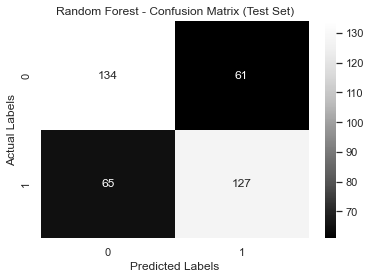

In [162]:
print('CLASSIFICATION REPORT (TEST SET): \n',classification_report(y_test, y_rf))
rf_scores = classification_report_scorer(rfr_pipeline, X_test, y_test)

print(rf_scores)

g = sns.heatmap(confusion_matrix(y_test, y_rf), annot=True, cmap='Greys_r', fmt='d')
# g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
g.set(xlabel='Predicted Labels', ylabel='Actual Labels')
g.set_title('Random Forest - Confusion Matrix (Test Set)')
plt.show()

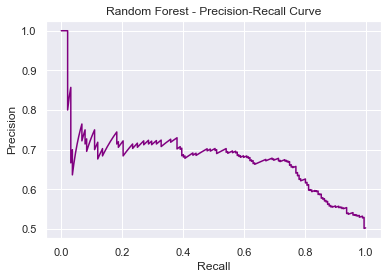

In [149]:
precision, recall, _ = precision_recall_curve(y_test, rfr_pipeline.predict_proba(X_test)[:,1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Random Forest - Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### 10.5 Naive Bayes Model

In [150]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
classifier = BernoulliNB()
bnb_pipeline = Pipeline(steps=[('pipeline', pipe), ('model', classifier)], verbose=True)
bnb_pipeline.fit(X_train, y_train)

[Pipeline] .......... (step 1 of 2) Processing pipeline, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('normalizer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('norm',
                                                                   PowerTransformer(method='box-cox'),
                                                                   [2, 1, 3, 4,
                                                                    5, 8,
                                                                    9])])),
                                 ('scaler',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale',
                                                                   StandardScaler(),
                                                                   [2, 1, 3, 4,
                                                                    5, 8,
                                                                    9])]))])),
                ('model', BernoulliNB())],
         verbose=True)

In [151]:
y_hat = bnb_pipeline.predict(X_train)
y_bnb = bnb_pipeline.predict(X_test)

In [152]:
print('CLASSIFICATION REPORT (TEST SET): \n',classification_report(y_test, y_bnb))
bnb_scores = classification_report_scorer(bnb_pipeline, X_test, y_test)

print(bnb_scores)

# g = sns.heatmap(confusion_matrix(y_test, y_bnb), annot=True, cmap='Greys_r', fmt='d')
# # g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
# g.set(xlabel='Predicted Labels', ylabel='Actual Labels')
# g.set_title('Bernoulli Naive Bayes - Confusion Matrix (Test Set)')
# plt.show()

CLASSIFICATION REPORT (TEST SET): 
               precision    recall  f1-score   support

           0       0.66      0.66      0.66       195
           1       0.65      0.65      0.65       192

    accuracy                           0.66       387
   macro avg       0.66      0.66      0.66       387
weighted avg       0.66      0.66      0.66       387

{'fbeta_0': 0.660860655737705, 'fbeta_1': 0.6517205422314911, 'matthews': 0.3125968271996218}


### 10.6 Voting Classifier - Bagging weak learners

In [153]:
# knn
knn = KNeighborsClassifier(n_neighbors = 13)
knnClf = Pipeline(steps=[('pipeline', pipe), ('model', knn)], verbose=True)

# log
log = LogisticRegression(penalty = 'l2', C = 0.03359818286283781, solver = 'liblinear', 
                         max_iter = 100, random_state=40)
logClf = Pipeline(steps=[('pipeline', pipe), ('model', log)], verbose=True)

# decision tree
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=2, class_weight='balanced', 
                            random_state=40)
dtClf = Pipeline(steps=[('pipeline', pipe), ('model', dt)], verbose=True)

# random forest
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',bootstrap= False,
                                    max_depth= 4,min_samples_leaf= 1, max_features='auto',
                                    min_samples_split= 10,random_state=40)
rfClf = Pipeline(steps=[('pipeline', pipe), ('model', rf)], verbose=True)

bnb = BernoulliNB()
bnbClf = Pipeline(steps=[('pipeline', pipe), ('model', bnb)], verbose=True)

# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators = [ ('log',logClf),('dt', dtClf)],
                                      # ('knn', knnClf), ('rf',rfClf),('bnb',bnbClf)], 
                        voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train)

[Pipeline] .......... (step 1 of 2) Processing pipeline, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] .......... (step 1 of 2) Processing pipeline, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


VotingClassifier(estimators=[('log',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('normalizer',
                                                                ColumnTransformer(remainder='passthrough',
                                                                                  transformers=[('norm',
                                                                                                 PowerTransformer(method='box-cox'),
                                                                                                 [2,
                                                                                                  1,
                                                                                                  3,
                                                                                                  4,
                                                                                                  5,
                                                                                                  8,
                                                                                                  9])])),
                                                               ('scaler',
                                                                ColumnTransformer(remainder='passthrough',
                                                                                  transformers=[('scale',
                                                                                                 StandardScaler(),
                                                                                                 [2,
                                                                                                  1,
                                                                                                  3,
                                                                                                  4,
                                                                                                  5,
                                                                                                  8,
                                                                                                  9])]))])),
                                              ('model',
                                               LogisticRegre...
                                                                ColumnTransformer(remainder='passthrough',
                                                                                  transformers=[('norm',
                                                                                                 PowerTransformer(method='box-cox'),
                                                                                                 [2,
                                                                                                  1,
                                                                                                  3,
                                                                                                  4,
                                                                                                  5,
                                                                                                  8,
                                                                                                  9])])),
                                                               ('scaler',
                                                                ColumnTransformer(remainder='passthrough',
                                                                                  transformers=[('scale',
                                                                                                 StandardScaler(),
                                                                         

In [154]:
y_hat = clf2.predict(X_train)
y_clf = clf2.predict(X_test)

In [155]:
print('CLASSIFICATION REPORT (TEST SET): \n',classification_report(y_test, y_clf))
clf_scores = classification_report_scorer(clf2, X_test, y_test)

print(clf_scores)

# g = sns.heatmap(confusion_matrix(y_test, y_clf), annot=True, cmap='Greys_r', fmt='d')
# # g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
# g.set(xlabel='Predicted Labels', ylabel='Actual Labels')
# g.set_title('Voting Classifier - Confusion Matrix (Test Set)')
# plt.show()

CLASSIFICATION REPORT (TEST SET): 
               precision    recall  f1-score   support

           0       0.69      0.58      0.63       195
           1       0.63      0.74      0.68       192

    accuracy                           0.66       387
   macro avg       0.66      0.66      0.66       387
weighted avg       0.66      0.66      0.66       387

{'fbeta_0': 0.59915164369035, 'fbeta_1': 0.7157258064516129, 'matthews': 0.32309986682378755}


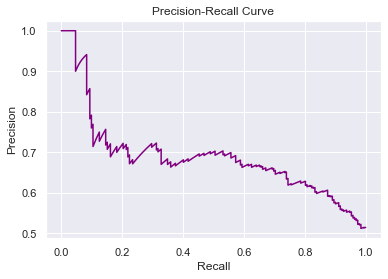

In [156]:
precision, recall, _ = precision_recall_curve(y_test, clf2.predict_proba(X_test)[:,1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## 11. Performance Evaluation

Text(0.5, 1.0, 'Receiver operating characteristic - Area Under Curve (ROC-AUC)')

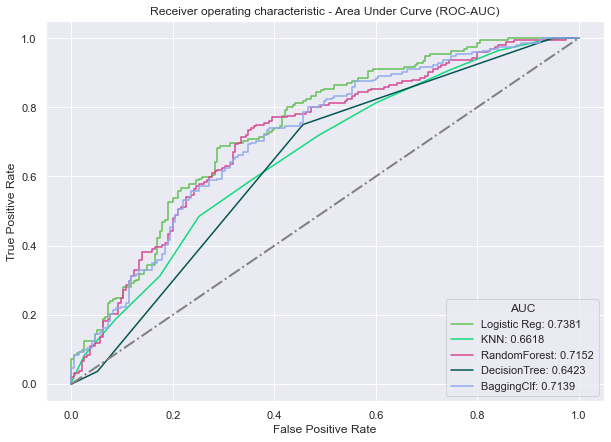

In [157]:
#Roc-Auc

from sklearn.metrics import auc, roc_auc_score, roc_curve

log_prob = log_pipeline.predict_proba(X_test)
knn_prob = knn_pipeline.predict_proba(X_test)
rfr_prob = rfr_pipeline.predict_proba(X_test)
dt_prob = dtr_pipeline.predict_proba(X_test)
clf_prob = clf2.predict_proba(X_test)

fpr_log, tpr_log, _ = roc_curve(y_test, log_prob[:,1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob[:,1])
fpr_rfr, tpr_rfr, _ = roc_curve(y_test, rfr_prob[:,1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_prob[:,1])
fpr_clf, tpr_clf, _ = roc_curve(y_test, clf_prob[:,1])

log_roc_auc = auc(fpr_log, tpr_log)
knn_roc_auc = auc(fpr_knn, tpr_knn)
rfr_roc_auc = auc(fpr_rfr, tpr_rfr)
dt_roc_auc = auc(fpr_dt, tpr_dt)
clf_roc_auc = auc(fpr_clf, tpr_clf)


plt.figure(figsize=(10,7))

plt.plot(fpr_log, tpr_log, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='Logistic Reg: %0.4f'% log_roc_auc)
plt.plot(fpr_knn, tpr_knn, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='KNN: %0.4f'% knn_roc_auc)
plt.plot(fpr_rfr, tpr_rfr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='RandomForest: %0.4f'% rfr_roc_auc)
plt.plot(fpr_dt, tpr_dt, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='DecisionTree: %0.4f'% dt_roc_auc)
plt.plot(fpr_clf, tpr_clf, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='BaggingClf: %0.4f'% clf_roc_auc)


plt.plot([0,1], 'grey', lw=2, linestyle='-.')

plt.legend(loc='lower right', title = 'AUC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic - Area Under Curve (ROC-AUC)')

Conclusion


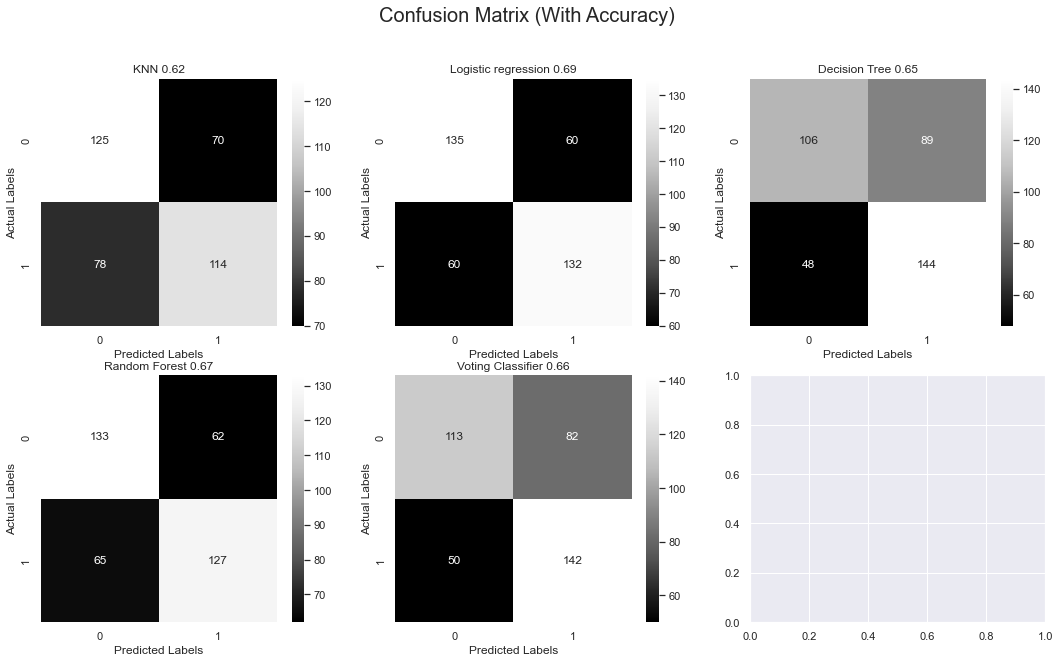

In [158]:
fig, ax = plt.subplots(2,3, figsize=(18,10))

ax1 = sns.heatmap(confusion_matrix(y_test, y_knn), annot=True, cmap='Greys_r', fmt='d', ax=ax[0][0])
# g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
ax1.set(xlabel='Predicted Labels', ylabel='Actual Labels')
ax1.set_title('KNN %0.2f' % accuracy_score(y_test, y_knn))

ax2 = sns.heatmap(confusion_matrix(y_test, y_log), annot=True, cmap='Greys_r', fmt='d', ax=ax[0][1])
# g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
ax2.set(xlabel='Predicted Labels', ylabel='Actual Labels')
ax2.set_title('Logistic regression %0.2f' % accuracy_score(y_test, y_log))

ax3 = sns.heatmap(confusion_matrix(y_test, y_dec), annot=True, cmap='Greys_r', fmt='d', ax=ax[0][2])
# g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
ax3.set(xlabel='Predicted Labels', ylabel='Actual Labels')
ax3.set_title('Decision Tree %0.2f' % accuracy_score(y_test, y_dec))

ax4 = sns.heatmap(confusion_matrix(y_test, y_rf), annot=True, cmap='Greys_r', fmt='d', ax=ax[1][0])
# g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
ax4.set(xlabel='Predicted Labels', ylabel='Actual Labels')
ax4.set_title('Random Forest %0.2f' % accuracy_score(y_test, y_rf))

ax5 = sns.heatmap(confusion_matrix(y_test, y_clf), annot=True, cmap='Greys_r', fmt='d', ax=ax[1][1])
# g.fig.suptitle('Confusion Matrix - Test Set')                                                                                                 
ax5.set(xlabel='Predicted Labels', ylabel='Actual Labels')
ax5.set_title('Voting Classifier %0.2f' % accuracy_score(y_test, y_clf))

fig.suptitle('Confusion Matrix (With Accuracy)', fontsize=20)
plt.show()

## Evaluation Metrics  
**Confusion Matrix**:  
>>> 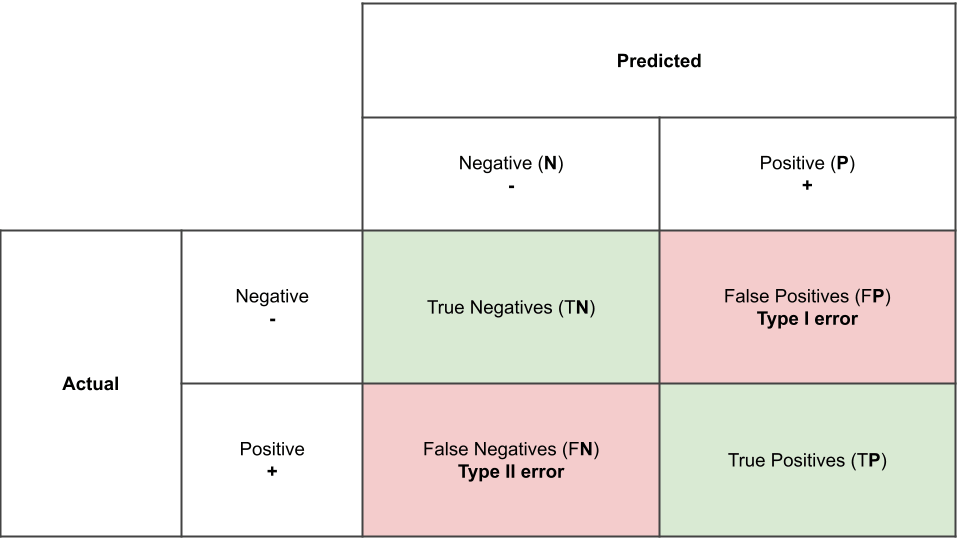
 
- In our binary classification problem we care more about the positive class.   
- We have **highly imbalanced data** with positive class represented with only 14% of total records. The accuracy score in this case would be misleading (classifying majority records as negative class).  
- In our experiment, we have used **f1 weighted score** and/or **f-beta score** as a scoring parameter for **hypertuning the model parameters**..  
- F-measure score is the harmonic mean of recall and precision. As we care more about recalls (less of false negatives or type II error), F-beta score with **beta value of 2** is used. Beta=2 means **recall is given more importance than precision** while evaluating model performance with F score.  
- **The choice of metrics**:   
> 1. **Type II Error**: False Negative Rate. It is cricial in healthcare, to minimize error 1 as much as possible and not to miss out on positive class.  
> 2. **Type I Error**: False Positive Rate. False positives are the subjects identified as positive class who actually do not have a disease of interest. This reflects into cost that would be incurred to treat or manage subject which could be avoided with minimizing error 2 as much as possible.  
- It is important to optimize errors 1 and 2 to get best out of the model.
- **Recall** (True Positive Rate) is calculated as :  
   
> $\frac {True Positives}{True Positives + False Negativs}$  
  
**Minimizing false negatives** correspond to increase in the recalls and decrease in Type I error. 
  
- **Precision** is calculated as:  
  
  > $\frac {True Positives}{True Positives + False Positives}$  
  
- **Visualizing Confusion Matrix** gives a pretty good idea about how model is able to classify different classes and compare the results.  
- **ROC-AUC Curve** is a curve that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR).  

## 12. Results

In [196]:
knn_report = classification_report(y_test, y_knn, output_dict=True)
log_report = classification_report(y_test, y_log, output_dict=True)
dtr_report = classification_report(y_test, y_dec, output_dict=True)
rfr_report = classification_report(y_test, y_rf, output_dict=True)
bnb_report = classification_report(y_test, y_bnb, output_dict=True)
clf_report = classification_report(y_test, y_clf, output_dict=True)

knn_cm = confusion_matrix(y_test, y_knn)
log_cm = confusion_matrix(y_test, y_log)
dtr_cm = confusion_matrix(y_test, y_dec)
rfr_cm = confusion_matrix(y_test, y_rf)
bnb_cm = confusion_matrix(y_test, y_bnb)
clf_cm = confusion_matrix(y_test, y_clf)

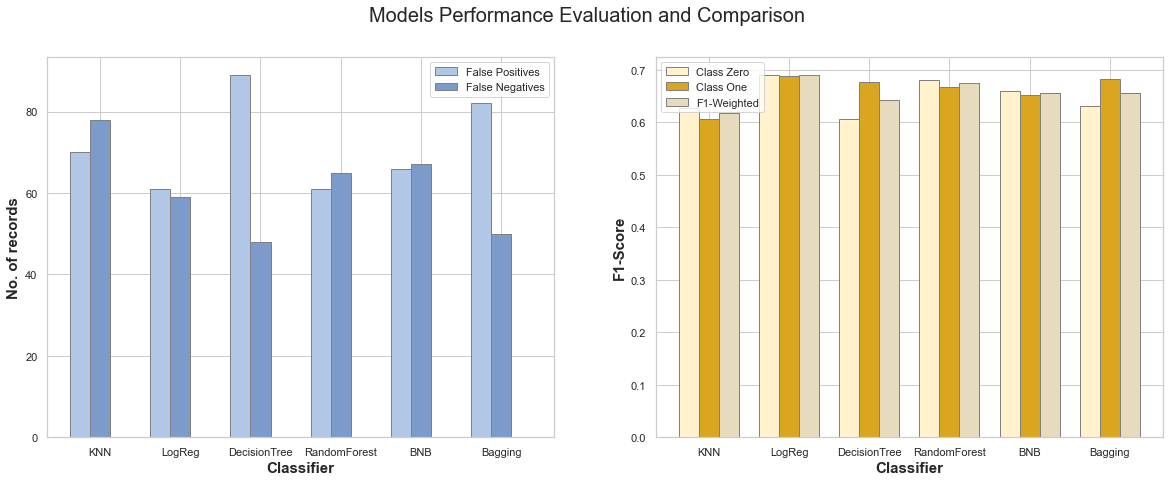

In [216]:

# set width of bar
barWidth = 0.25
reports = [knn_report, log_report, dtr_report, rfr_report, bnb_report, clf_report]
cms = [knn_cm, log_cm, dtr_cm, rfr_cm, bnb_cm, clf_cm]

fig, (ax1, ax2) = plt.subplots(1,2,figsize =(20, 7), sharex=True)
fig.suptitle('Models Performance Evaluation and Comparison', fontsize=20)

# First Plot

fp = [cm[0][1] for cm in cms]
fn = [cm[1][0] for cm in cms]

brfp = np.arange(len(fp))
brfn = [x + barWidth for x in brfp]

ax1.bar(brfp, fp, color ='#b2c7e5', width = barWidth,
        edgecolor ='grey', label ='False Positives')
ax1.bar(brfn, fn, color ='#7d9bca', width = barWidth,
        edgecolor ='grey', label ='False Negatives')

ax1.set_xlabel('Classifier', fontweight ='bold', fontsize = 15)
ax1.set_ylabel('No. of records', fontweight ='bold', fontsize = 15)
ax1.set_xticks([r + barWidth for r in range(len(fp))])
ax1.set_xticklabels(['KNN', 'LogReg', 'DecisionTree', 'RandomForest', 'BNB', 'Bagging'])

ax1.legend()

# Second Plot
classZero = [report['0']['f1-score'] for report in reports]
classOne = [report['1']['f1-score'] for report in reports]
weighted = [report['weighted avg']['f1-score'] for report in reports]

br1 = np.arange(len(classZero))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

ax2.bar(br1, classZero, color ='#fff2cc', width = barWidth,
        edgecolor ='grey', label ='Class Zero')
ax2.bar(br2, classOne, color ='#daa520', width = barWidth,
        edgecolor ='grey', label ='Class One')
ax2.bar(br3, weighted, color ='#e7dbbe', width = barWidth,
        edgecolor ='grey', label ='F1-Weighted')

ax2.set_xlabel('Classifier', fontweight ='bold', fontsize = 15)
ax2.set_ylabel('F1-Score', fontweight ='bold', fontsize = 15)
ax2.set_xticks([r + barWidth for r in range(len(classZero))])
ax2.set_xticklabels(['KNN', 'LogReg', 'DecisionTree', 'RandomForest', 'BNB', 'Bagging'])
ax2.legend()

plt.show()

## Results:  
- **Train-Test Split** - Balanced dataset as a result of undersampling was split into train and test samples with 0.3 (30%) partition. 
- **Data Pipeline** - The numerical variables were transformed with the power transformer using box-cox transformation method. This technique transforms the variable distribution to more normal distribution and also takes care of outliers.  
- **Grid Search** Hyperparameters for each classifier were tuned and tested by performing grid search with **3-fold stratified validation** and **F-beta score** to select best estimator for each model.  
- **Models Applied** - Total 5 models were applied. K-Nearest Neighbour, Logistic Regression, Decision Tree, Random Forest and Bernoulli's Naive Beyes Classifiers.
- In terms of overall f1 score, logistic regression performed best with 69% f1 score for both classes.
- The decision tree was able to reduce type II error with least false negatives (48), but at the cost of higher false positives (89).
- **Bagging method** was applied by combining multiple classifiers to improve false negatives and false positives. The voting classifier performed well with better f1 score and least false negatives with slight improvement in false positives in comparison to decision tree model.
- Overall, Logistic regression model performed well while decision tree providing promise in reducing recall rate in positive class at the cost of negative class identified as positive.  

## 13. Challenges and Limitations

Challenges:  
- Imbalanced Target Variable (Positive class represented as 14% of all records only)
- 10-year risk estimation can not be performed for participants who didn't turn up for follow up visits during the study, which might have resulted in biased actual labeling.
- Data represents limited features. Over the years identified risk factors for CHD might be missing in our dataset.(like Cholesterol levels, fasting blood glucose, diet factors, ethnicity). 
- Reliability of features like cigs per day smoked can be misleading and inaccurate and subjective. Also, glucose levels which is described by FHS team as Casual serum glucose (mg/dL) could be misleading and not enough.  
  
Limitations:  
- Data belongs to specific population group of US and can not be applied to other regions which might show variability in the risk factors distribution.  
- Model performance could not be improved past 70% scoring/ ROC-AUC score, thus is unfit to apply in clinical settings.  

## 14. Future Scope  
- Feature selection and engineeering 
- PCA to get more information out of available features. 
- Implementing Boosting algorithms 

**Acknowledgement** : Biologic Specimen and Data Repository Information Coordinating Center (BioLINCC), The National Heart, Lung, and Blood Institute (NHLBI), NHI for providing data at request.